# Predicting Draft Picks
## 3. EDA & Hypothesis Testing

What turns a mere prospect into an actual pick for the NFL? 

Before I start modeling, I want to check out my data and get to know what will matter when trying to determine whether or not a prospect will be selected. I start by visualizing the distribution of my outcome. From there I pass each variable I think I may want in my model through a hypothesis test to determine if it will be meaningful in identifying 'Drafted' versus 'Not Drafted'.

First things first, I need to load in my libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import scipy
from scipy.stats import chisquare

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_pickle('../mod5project/pickle_files/cleaned_df')

In [4]:
df.head()

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,DraftedvNotDrafted,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,Drafted,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [5]:
df.shape

(5492, 122)

## Functions

In [6]:
def plot_outcomes(df):
    """
    This function returns the count for each round and graphs it. Along with the count,
    it will also print the normalized count -- % to total -- as a point of comparison.
    
    Parameters:
        df: original dataframe that read in cleaned data
    
    Returns:
        Dataframe shape, value counts for each round and the countplot for the distribution
        
    """
    dataframe = df
    print('Drafted Count: ')
    print('-'*40)
    print('DF Shape: ', dataframe.shape)
    print(dataframe['DraftedvNotDrafted'].value_counts())
    print(round(dataframe['DraftedvNotDrafted'].value_counts(normalize=True), 2))
    plt.figure(figsize=(10, 6))
    sns.countplot(dataframe['DraftedvNotDrafted'], palette='Blues');
    plt.title('Drafted Distribution')
    plt.savefig('../mod5project/images/round_distro')
    plt.show()

In [7]:
def plot_stats_box(df, lst):
    """
    The function returns the descriptive statistics for each item in a list. The list in question is a set of 
    feature I'm parsing through to determine if they're statistically significant. I want to first check their 
    distribution by plotting each feature's bar graph.
    
    Parameters:
        df: original dataframe that read in cleaned data
        lst: feature list
        
    Returns:
        Prints descriptive statistics, mean by Round for the feature and plots the distribution boxplot.
    
    """
    for i in lst:
        dataframe = df
        print(i + ' Summary:')
        print(dataframe[i].describe())
        print('-' * 40)
        print(i + ' Drafted vs Not Drafted')
        print(dataframe[['DraftedvNotDrafted', i]].groupby(['DraftedvNotDrafted']).mean())
        plt.figure(figsize = (10,6))
        plt.title(i + ' Distribution')
        sns.boxplot(y=dataframe[i], x=dataframe['DraftedvNotDrafted'], palette = 'Blues')
        plt.savefig('../mod5project/images/' + i + '_Distro')
        plt.show()

In [8]:
def plot_stats_bar(df, lst):
    """
    The function returns the descriptive statistics for each item in a list. The list in question is a set of 
    feature I'm parsing through to determine if they're statistically significant. I want to first check their 
    distribution by plotting each feature's bar graph.
    
    Parameters:
        df: original dataframe that read in cleaned data
        lst: feature list
        
    Returns:
        Prints descriptive statistics, mean by Round for the feature and plots the distribution boxplot.
    
    """
    for i in lst:
        dataframe = df
        print(i + ' Summary:')
        print(dataframe[i].describe())
        print('-' * 40)
        print(i + ' Drafted vs Not Drafted')
        print(dataframe[['DraftedvNotDrafted', i]].groupby(['DraftedvNotDrafted']).mean())      
        feature_mean = dataframe[['DraftedvNotDrafted', i]].groupby(['DraftedvNotDrafted']).mean()
        feature_mean.plot(kind = 'bar', stacked = False, legend = False, figsize = (10, 6))
        plt.title(i + ' Average')
        plt.xticks()
        plt.xlabel('Drafted?')
        plt.savefig('../mod5project/images/' + i + 'Avg')
        plt.show()

In [9]:
def anova_tukey(df, feature):
    """
    This function runs the ANOVA test checking for significance between a given feature and the output variable.
    
    Parameters:
        df: original dataframe that read in cleaned data
        feature: feature being tested  
        
    Returns:
        Prints ANOVA test summary and Tukey-MC analysis
    
    """
    dataframe = df
    anova_drafted = ols(feature+'~DraftedvNotDrafted', data=dataframe).fit()
    anova_drafted
    anova_table = sm.stats.anova_lm(anova_drafted, type=2)
    print(anova_table)
    print('')
    mc = MultiComparison(dataframe[feature], dataframe['DraftedvNotDrafted'])
    mc_results = mc.tukeyhsd()
    print(mc_results.summary())

In [10]:
def two_side_ttest(df, feature):
    """
    This function performs a two sided t-test to check for significance between a given feature and the output
    variable.
    
    Parameters:
        df: original dataframe that read in cleaned data
        feature: feature being tested  
        
    Returns:
        Prints t statistic and p-value.
    """
    alpha = 0.05
    
    Drafted = df[df['DraftedvNotDrafted'] == 'Drafted']
    Drafted = Drafted[feature]
#     print(Drafted.head())
    Not_Drafted = df[df['DraftedvNotDrafted'] == 'Not Drafted']
    Not_Drafted = Not_Drafted[feature]
    
    t_test = stats.ttest_ind(Drafted, Not_Drafted)
    print('T-stastistic: ', t_test[0])
    print('P-value: ', t_test[1])
    print(' ')
    if t_test[1] < alpha:
        print('The p-value is less than alpha. We can reject the null hypothesis.')
    else:
        print('The p-value is not less than alpha. We fail to reject the null hypothesis.')

In [11]:
def position_group_breakdown(df):
    """
    This function breaks down the drafted/not drafted counts and percentages for each of the position groups.
    
    Parameters:
        df: dataframe
        
    Returns:
        Printed value counts for each position group as well as the printed normalized value counts for each.
        
    """
    
    pos_group = list(np.unique(df['Pos']))
    for i in pos_group:
        dataframe = df[df['Pos'] == i]
        print(i + ' Drafted Count: ')
        print('-'*40)
        print('DF Shape: ', dataframe.shape)
        print('')
        print(dataframe['DraftedvNotDrafted'].value_counts())
        print(round(dataframe['DraftedvNotDrafted'].value_counts(normalize=True), 2))
        print('')
        print('')

## EDA

First things first, I need to check the distribution of my outcome.

In [12]:
df.shape

(5492, 122)

Drafted Count: 
----------------------------------------
DF Shape:  (5492, 122)
Drafted        3757
Not Drafted    1735
Name: DraftedvNotDrafted, dtype: int64
Drafted       0.68
Not Drafted   0.32
Name: DraftedvNotDrafted, dtype: float64


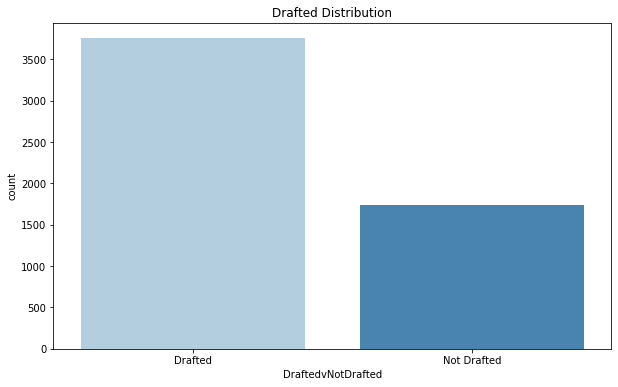

In [13]:
plot_outcomes(df)

One of the biggest assumptions I came in with was the your position, or in this case position group, helps decide your Round in the NFL draft. Below I investigate that visually.

Total Count by Position Group: 
Receivers         1812
DefensiveBacks    1101
SpecialTeams      1004
LBs                681
OffensiveLine      562
QBs                332
Name: Pos, dtype: int64 
 Receivers        0.33
DefensiveBacks   0.20
SpecialTeams     0.18
LBs              0.12
OffensiveLine    0.10
QBs              0.06
Name: Pos, dtype: float64
----------------------------------------
Total Drafted Count by Position Group vs Not Drafted Count: 
Receivers         1172
DefensiveBacks     772
SpecialTeams       670
LBs                492
OffensiveLine      435
QBs                216
Name: Pos, dtype: int64 
 Receivers         640
SpecialTeams      334
DefensiveBacks    329
LBs               189
OffensiveLine     127
QBs               116
Name: Pos, dtype: int64
----------------------------------------
Drafted Position Group % to TTL vs Not Drafted:
Receivers        0.31
DefensiveBacks   0.21
SpecialTeams     0.18
LBs              0.13
OffensiveLine    0.12
QBs              0.06
Nam

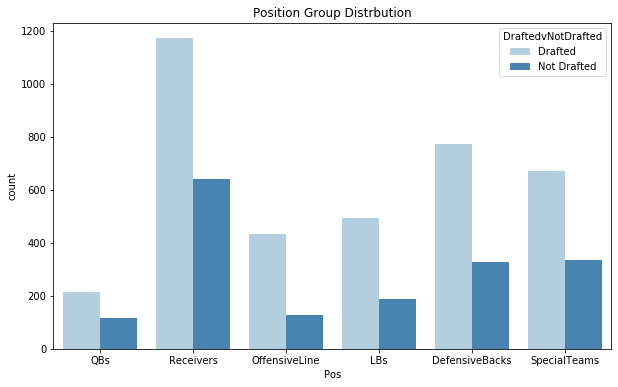

In [14]:
Drafted = df[df['DraftedvNotDrafted'] == 'Drafted']
Drafted = Drafted[['DraftedvNotDrafted', 'Pos']]
Not_Drafted = df[df['DraftedvNotDrafted'] == 'Not Drafted']
Not_Drafted = Not_Drafted[['DraftedvNotDrafted', 'Pos']]
print('Total Count by Position Group: ')
print(df.Pos.value_counts(),'\n', df.Pos.value_counts(normalize=True))
print('-'*40)
print('Total Drafted Count by Position Group vs Not Drafted Count: ')
print(Drafted.Pos.value_counts(),'\n', Not_Drafted.Pos.value_counts())
print('-' * 40)
print('Drafted Position Group % to TTL vs Not Drafted:')
print(Drafted.Pos.value_counts(normalize=True),'\n', Not_Drafted.Pos.value_counts(normalize=True))
order = ['QBs', 'Receivers', 'OffensiveLine', 'LBs', 'DefensiveBacks', 'SpecialTeams']
plt.figure(figsize=(10, 6))
sns.countplot(df['Pos'], hue=df['DraftedvNotDrafted'], palette = 'Blues', order=order)
plt.title('Position Group Distrbution')
plt.savefig('../mod5project/images/PosGroup_Distro')
plt.show()

Overall, the Receivers group dominates the observations I have. It makes up 33% of my total dataset, where Defensive Backs makes up 20% and so on. Now when I look at Drafted, Receivers make up 31% of the total where in Not Drafted, they make up 37%.

In [15]:
position_group_breakdown(df)

DefensiveBacks Drafted Count: 
----------------------------------------
DF Shape:  (1101, 122)

Drafted        772
Not Drafted    329
Name: DraftedvNotDrafted, dtype: int64
Drafted       0.70
Not Drafted   0.30
Name: DraftedvNotDrafted, dtype: float64


LBs Drafted Count: 
----------------------------------------
DF Shape:  (681, 122)

Drafted        492
Not Drafted    189
Name: DraftedvNotDrafted, dtype: int64
Drafted       0.72
Not Drafted   0.28
Name: DraftedvNotDrafted, dtype: float64


OffensiveLine Drafted Count: 
----------------------------------------
DF Shape:  (562, 122)

Drafted        435
Not Drafted    127
Name: DraftedvNotDrafted, dtype: int64
Drafted       0.77
Not Drafted   0.23
Name: DraftedvNotDrafted, dtype: float64


QBs Drafted Count: 
----------------------------------------
DF Shape:  (332, 122)

Drafted        216
Not Drafted    116
Name: DraftedvNotDrafted, dtype: int64
Drafted       0.65
Not Drafted   0.35
Name: DraftedvNotDrafted, dtype: float64


Receivers 

### Height & Weight

In [16]:
height_weight = ['Height', 'Weight']

Height Summary:
count   5492.00
mean      73.54
std        2.59
min       65.00
25%       72.00
50%       74.00
75%       75.00
max       82.00
Name: Height, dtype: float64
----------------------------------------
Height Drafted vs Not Drafted
                    Height
DraftedvNotDrafted        
Drafted              73.70
Not Drafted          73.18


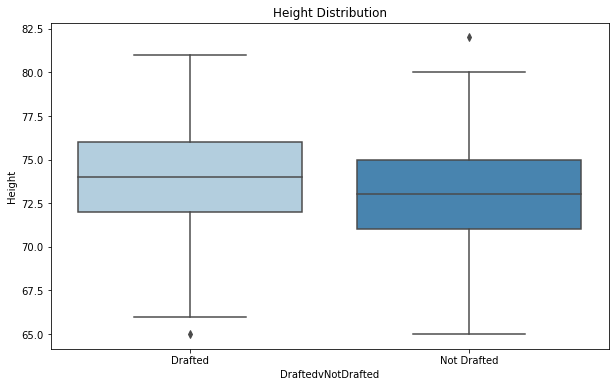

Weight Summary:
count   5492.00
mean     236.85
std       41.56
min      149.00
25%      204.00
50%      227.00
75%      260.00
max      375.00
Name: Weight, dtype: float64
----------------------------------------
Weight Drafted vs Not Drafted
                    Weight
DraftedvNotDrafted        
Drafted             240.23
Not Drafted         229.53


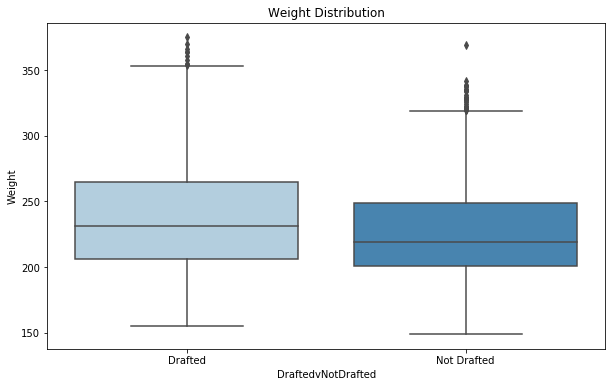

In [17]:
plot_stats_box(df, height_weight)

#### Height

H0: The height of players drafted is the same as the height of players not drafted.

H1: The height of players drafted is not the same as the height of playes not drafted.

In [18]:
two_side_ttest(df, 'Height')

T-stastistic:  6.957513594136664
P-value:  3.8676821760252185e-12
 
The p-value is less than alpha. We can reject the null hypothesis.


Based on my two sided t-test, I reject the null hypothesis. Height is different depending on whether or not a player is drafted. I'll be sure to include it in my feature list when modeling.

#### Weight

H0: The weight of players drafted are the same between rounds.

H1: The weight of players drafted are not the same between rounds.

In [19]:
two_side_ttest(df, 'Weight')

T-stastistic:  8.933240413397648
P-value:  5.55329550190009e-19
 
The p-value is less than alpha. We can reject the null hypothesis.


Once again, I reject the null hypothesis and will include Weight when predicting drafted vs not drafted pick.

### Combine Stats

First, I want to look at the descriptive statistics for the combine results.

In [20]:
combine_stats = ['_40yd', 'Vertical', 'Bench', 'BroadJump', '_3Cone', 'Shuttle']
df[combine_stats].describe()

,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,4.61,29.34,16.70,101.48,5.75,3.50
std,0.58,7.99,7.42,26.08,1.91,1.15
min,2.23,11.75,2.00,50.14,0.00,0.00
25%,4.51,24.50,9.70,93.00,3.58,2.16
50%,4.64,32.00,16.00,113.00,6.90,4.15
75%,4.87,35.00,22.00,120.00,7.22,4.38
max,6.00,46.00,49.00,147.00,9.04,5.56


_40yd Summary:
count   5492.00
mean       4.61
std        0.58
min        2.23
25%        4.51
50%        4.64
75%        4.87
max        6.00
Name: _40yd, dtype: float64
----------------------------------------
_40yd Drafted vs Not Drafted
                    _40yd
DraftedvNotDrafted       
Drafted              4.61
Not Drafted          4.62


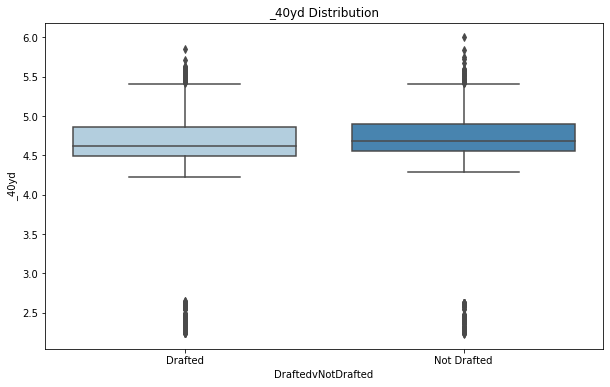

Vertical Summary:
count   5492.00
mean      29.34
std        7.99
min       11.75
25%       24.50
50%       32.00
75%       35.00
max       46.00
Name: Vertical, dtype: float64
----------------------------------------
Vertical Drafted vs Not Drafted
                    Vertical
DraftedvNotDrafted          
Drafted                29.77
Not Drafted            28.40


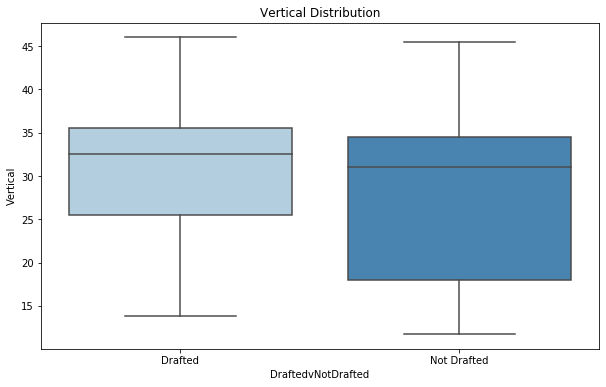

Bench Summary:
count   5492.00
mean      16.70
std        7.42
min        2.00
25%        9.70
50%       16.00
75%       22.00
max       49.00
Name: Bench, dtype: float64
----------------------------------------
Bench Drafted vs Not Drafted
                    Bench
DraftedvNotDrafted       
Drafted             17.41
Not Drafted         15.15


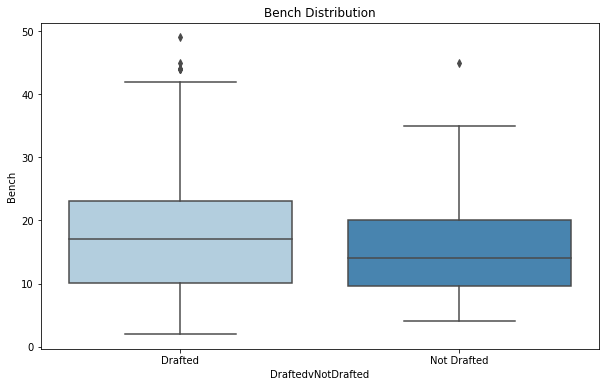

BroadJump Summary:
count   5492.00
mean     101.48
std       26.08
min       50.14
25%       93.00
50%      113.00
75%      120.00
max      147.00
Name: BroadJump, dtype: float64
----------------------------------------
BroadJump Drafted vs Not Drafted
                    BroadJump
DraftedvNotDrafted           
Drafted                102.45
Not Drafted             99.37


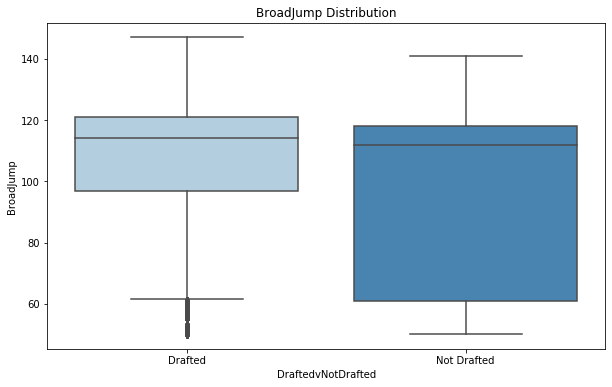

_3Cone Summary:
count   5492.00
mean       5.75
std        1.91
min        0.00
25%        3.58
50%        6.90
75%        7.22
max        9.04
Name: _3Cone, dtype: float64
----------------------------------------
_3Cone Drafted vs Not Drafted
                    _3Cone
DraftedvNotDrafted        
Drafted               5.83
Not Drafted           5.57


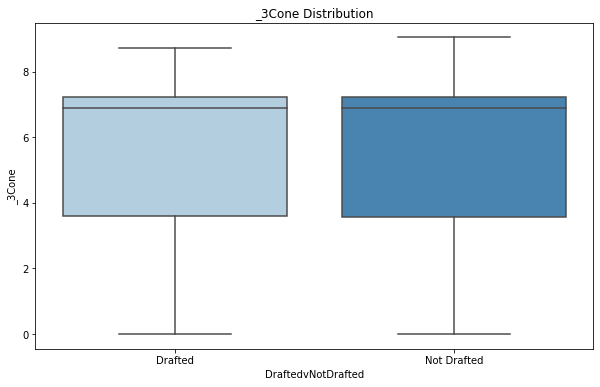

Shuttle Summary:
count   5492.00
mean       3.50
std        1.15
min        0.00
25%        2.16
50%        4.15
75%        4.38
max        5.56
Name: Shuttle, dtype: float64
----------------------------------------
Shuttle Drafted vs Not Drafted
                    Shuttle
DraftedvNotDrafted         
Drafted                3.54
Not Drafted            3.42


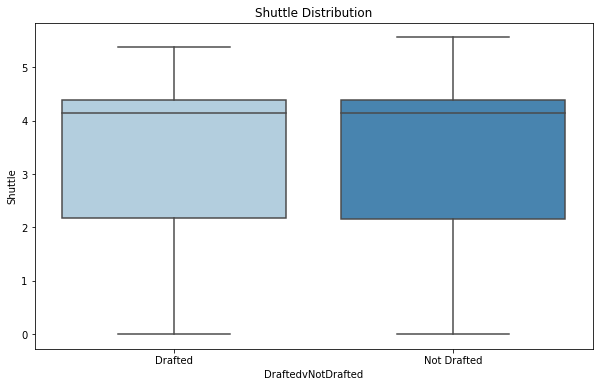

In [21]:
plot_stats_box(df, combine_stats)

From the graphs above, it looks like some of these features will be statistically significant between drafted and not drafted. I'll confirm by passing each through my two sided t-test.

#### 40yd Dash

H0: The average 40yd dash is the same between drafted and not drafted.

H1: The average 40yd dash is not the same between drafted and not drafted.

#### Vertical

H0: The average vertical is the same between drafted and not drafted.

H1: The average vertical is not the same between drafted and not drafted.

#### Bench Press

H0: The average bench press is the same between drafted and not drafted.

H1: The average bench press is not the same between drafted and not drafted.

#### Broad Jump

H0: The average broad jump is the same between drafted and not drafted.

H1: The average broad jump is not the same between drafted and not drafted.

#### 3 cone

H0: The average 3 cone is the same between drafted and not drafted.

H1: The average 3 cone is not the same between drafted and not drafted.

#### Shuttle

H0: The average shuttle is the same between drafted and not drafted.

H1: The average shuttle is not the same between drafted and not drafted.

In [22]:
for i in combine_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df, i)
    print('')
    print('*' * 60)

_40yd T Test:
----------------------------------------
T-stastistic:  -0.43273014329919185
P-value:  0.6652278263425027
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

************************************************************
Vertical T Test:
----------------------------------------
T-stastistic:  5.929608325581313
P-value:  3.221809981433548e-09
 
The p-value is less than alpha. We can reject the null hypothesis.

************************************************************
Bench T Test:
----------------------------------------
T-stastistic:  10.618310537952176
P-value:  4.3802183225375226e-26
 
The p-value is less than alpha. We can reject the null hypothesis.

************************************************************
BroadJump T Test:
----------------------------------------
T-stastistic:  4.0711399375109165
P-value:  4.744135897298839e-05
 
The p-value is less than alpha. We can reject the null hypothesis.

***************************************

So when it comes to the 40yd dash, I fail to reject the null hypothesis that there is a difference between scores of those drafted compared to those who are not drafted. As for the rest of the combine results, there is a statistically significant difference between the two categories and they will help identify 'Drafted' vs 'Not Drafted'.

### Shuttle Run & BroadJump Graphs

Shuttle Run Summary:
count   5492.00
mean       3.50
std        1.15
min        0.00
25%        2.16
50%        4.15
75%        4.38
max        5.56
Name: Shuttle, dtype: float64
----------------------------------------
Shuttle Run Drafted vs Not Drafted
                    Shuttle
DraftedvNotDrafted         
Drafted                3.54
Not Drafted            3.42


Text(0, 0.5, 'Draft Status')

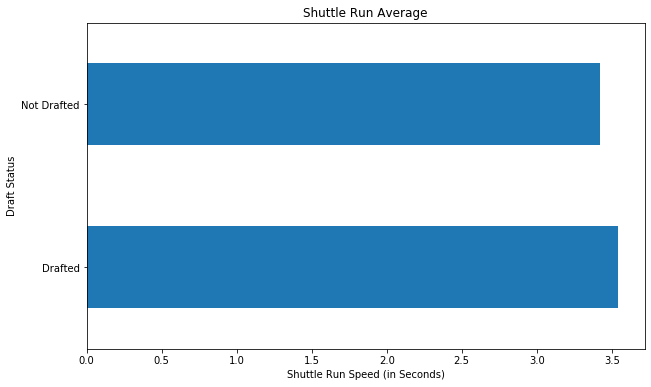

In [33]:
print('Shuttle Run Summary:')
print(df['Shuttle'].describe())
print('-' * 40)
print('Shuttle Run Drafted vs Not Drafted')
print(df[['DraftedvNotDrafted', i]].groupby(['DraftedvNotDrafted']).mean())
      
feature_mean = df[['DraftedvNotDrafted', 'Shuttle']].groupby(['DraftedvNotDrafted']).mean()
feature_mean.plot(kind = 'barh', stacked = False, legend = False, figsize = (10, 6))
plt.title('Shuttle Run Average')
plt.xticks()
plt.xlabel('Shuttle Run Speed (in Seconds)')
plt.ylabel('Draft Status')


Broad Jump Summary:
count   5492.00
mean       3.50
std        1.15
min        0.00
25%        2.16
50%        4.15
75%        4.38
max        5.56
Name: Shuttle, dtype: float64
----------------------------------------
Broad Jump Drafted vs Not Drafted
                    BroadJump
DraftedvNotDrafted           
Drafted                102.45
Not Drafted             99.37


Text(0, 0.5, 'Draft Status')

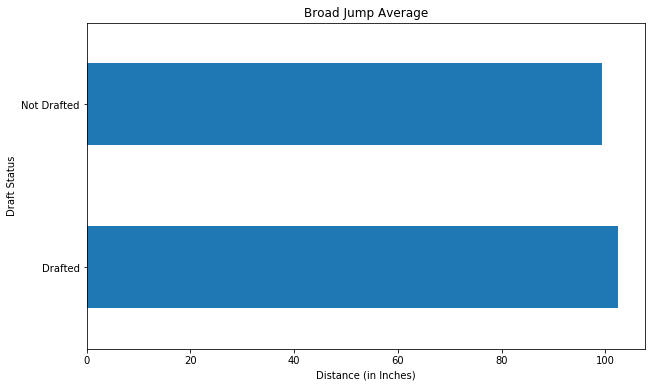

In [34]:
print('Broad Jump Summary:')
print(df['Shuttle'].describe())
print('-' * 40)
print('Broad Jump Drafted vs Not Drafted')
print(df[['DraftedvNotDrafted', 'BroadJump']].groupby(['DraftedvNotDrafted']).mean())
      
feature_mean = df[['DraftedvNotDrafted', 'BroadJump']].groupby(['DraftedvNotDrafted']).mean()
feature_mean.plot(kind = 'barh', stacked = False, legend = False, figsize = (10, 6))
plt.title('Broad Jump Average')
plt.xticks()
plt.xlabel('Distance (in Inches)')
plt.ylabel('Draft Status')

### College Stats - Passing

I want to look at the college stats like I did for the combine results. I split these features up based on the overarching theme - ie Passing, Rushing, Defense, Kicking, Punt Returning and Scoring. First up is Passing.

In [174]:
passing_stats = ['Passing_Games', 'Completions', 'Pass_Attempts', 'Completion_Percent', 'Pass_Yards', 
                 'Pass_Yds_per_Attempt', 'Adj_Pass_Yds_per_Attempt', 'Pass_TDs', 'Pass_Interceptions', 'Passer_Rating', 
                 'CompletionsperGame', 'Pass_AttemptsperGame', 'Pass_YardsperGame', 'Pass_TDsperGame', 
                 'Pass_InterceptionsperGame']

In [175]:
df[passing_stats].describe()

,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,1.92,14.95,23.99,6.72,190.28,1.06,1.14,1.49,0.59,19.71,1.22,1.96,15.52,0.12,0.05
std,4.44,60.99,96.53,21.13,770.39,4.27,6.01,6.20,2.44,77.57,4.91,7.82,61.94,0.50,0.20
min,0.00,0.00,0.00,0.00,-9.00,-9.00,-45.00,0.00,0.00,-200.00,0.00,0.00,-0.64,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,493.00,719.00,100.00,5833.00,81.00,101.00,60.00,22.00,1110.40,39.33,58.44,448.69,4.00,1.70


Passing_Games Summary:
count   5492.00
mean       1.92
std        4.44
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       15.00
Name: Passing_Games, dtype: float64
----------------------------------------
Passing_Games Drafted vs Not Drafted
                    Passing_Games
DraftedvNotDrafted               
Drafted                      1.78
Not Drafted                  2.23


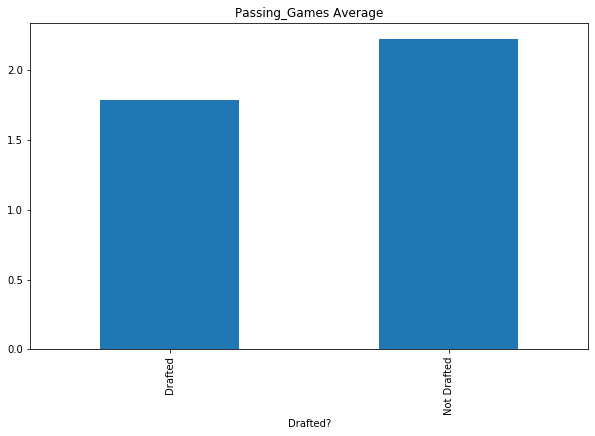

Completions Summary:
count   5492.00
mean      14.95
std       60.99
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      493.00
Name: Completions, dtype: float64
----------------------------------------
Completions Drafted vs Not Drafted
                    Completions
DraftedvNotDrafted             
Drafted                   14.64
Not Drafted               15.60


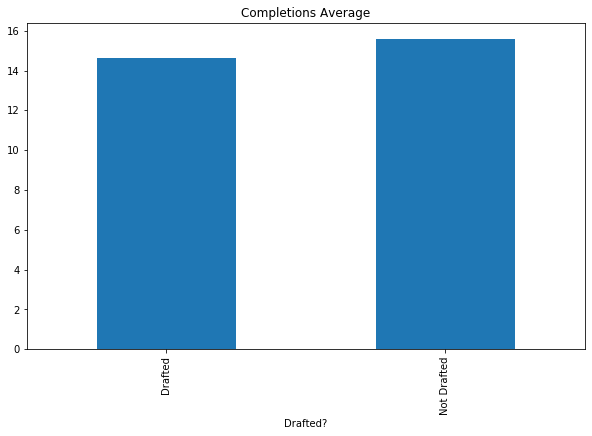

Pass_Attempts Summary:
count   5492.00
mean      23.99
std       96.53
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      719.00
Name: Pass_Attempts, dtype: float64
----------------------------------------
Pass_Attempts Drafted vs Not Drafted
                    Pass_Attempts
DraftedvNotDrafted               
Drafted                     23.27
Not Drafted                 25.53


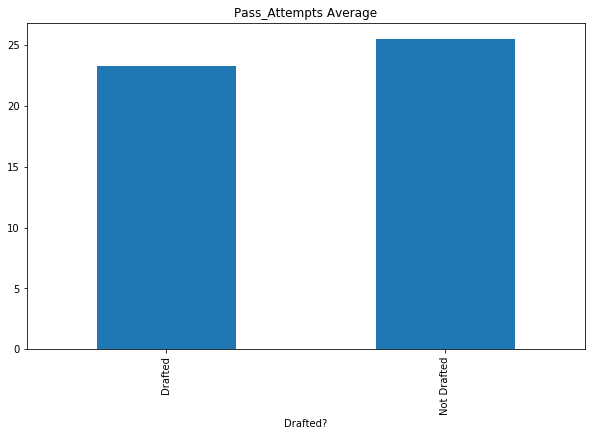

Completion_Percent Summary:
count   5492.00
mean       6.72
std       21.13
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      100.00
Name: Completion_Percent, dtype: float64
----------------------------------------
Completion_Percent Drafted vs Not Drafted
                    Completion_Percent
DraftedvNotDrafted                    
Drafted                           6.35
Not Drafted                       7.52


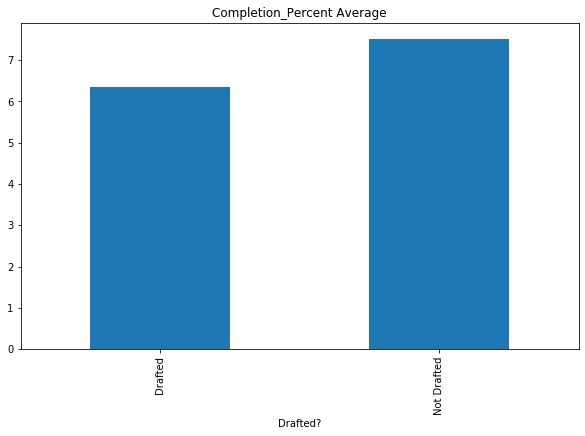

Pass_Yards Summary:
count   5492.00
mean     190.28
std      770.39
min       -9.00
25%        0.00
50%        0.00
75%        0.00
max     5833.00
Name: Pass_Yards, dtype: float64
----------------------------------------
Pass_Yards Drafted vs Not Drafted
                    Pass_Yards
DraftedvNotDrafted            
Drafted                 187.55
Not Drafted             196.19


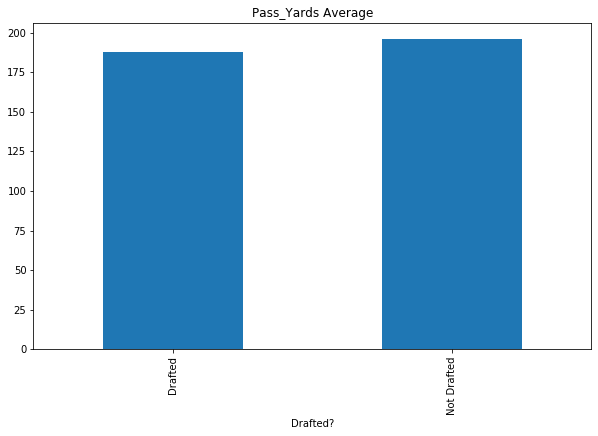

Pass_Yds_per_Attempt Summary:
count   5492.00
mean       1.06
std        4.27
min       -9.00
25%        0.00
50%        0.00
75%        0.00
max       81.00
Name: Pass_Yds_per_Attempt, dtype: float64
----------------------------------------
Pass_Yds_per_Attempt Drafted vs Not Drafted
                    Pass_Yds_per_Attempt
DraftedvNotDrafted                      
Drafted                             1.00
Not Drafted                         1.21


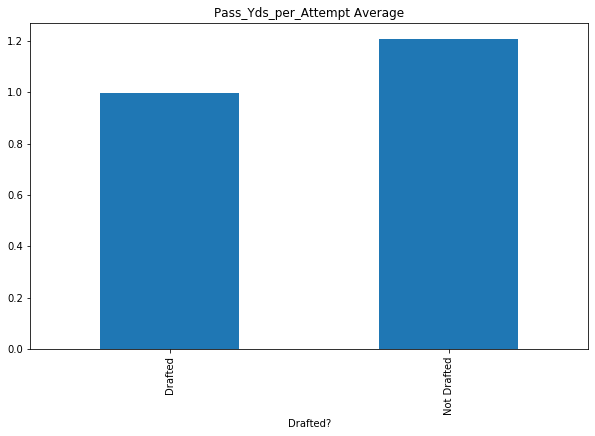

Adj_Pass_Yds_per_Attempt Summary:
count   5492.00
mean       1.14
std        6.01
min      -45.00
25%        0.00
50%        0.00
75%        0.00
max      101.00
Name: Adj_Pass_Yds_per_Attempt, dtype: float64
----------------------------------------
Adj_Pass_Yds_per_Attempt Drafted vs Not Drafted
                    Adj_Pass_Yds_per_Attempt
DraftedvNotDrafted                          
Drafted                                 1.10
Not Drafted                             1.21


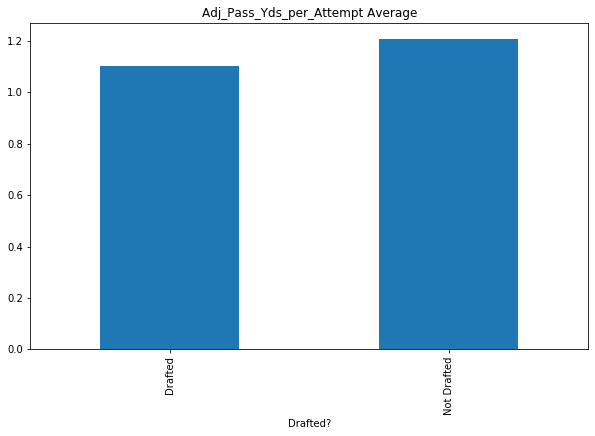

Pass_TDs Summary:
count   5492.00
mean       1.49
std        6.20
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       60.00
Name: Pass_TDs, dtype: float64
----------------------------------------
Pass_TDs Drafted vs Not Drafted
                    Pass_TDs
DraftedvNotDrafted          
Drafted                 1.48
Not Drafted             1.52


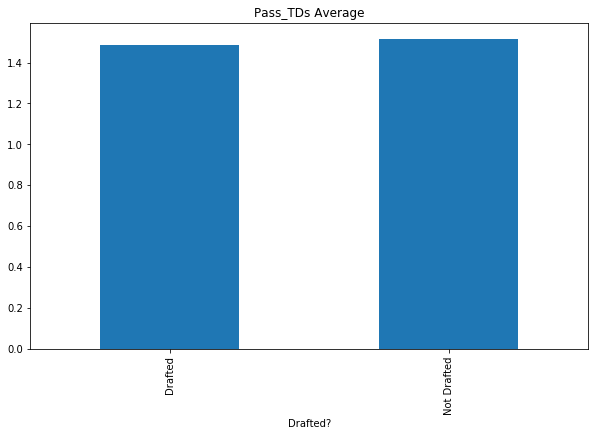

Pass_Interceptions Summary:
count   5492.00
mean       0.59
std        2.44
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       22.00
Name: Pass_Interceptions, dtype: float64
----------------------------------------
Pass_Interceptions Drafted vs Not Drafted
                    Pass_Interceptions
DraftedvNotDrafted                    
Drafted                           0.56
Not Drafted                       0.66


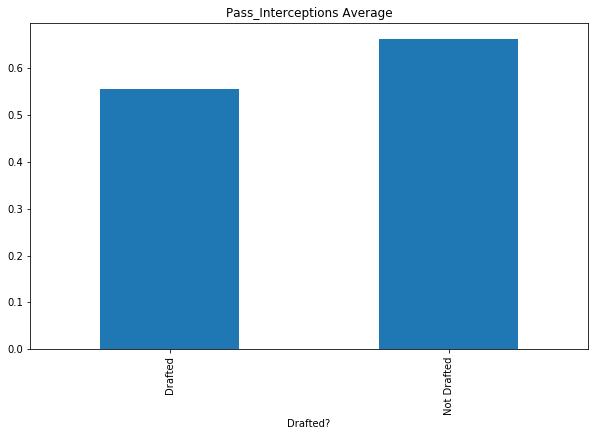

Passer_Rating Summary:
count   5492.00
mean      19.71
std       77.57
min     -200.00
25%        0.00
50%        0.00
75%        0.00
max     1110.40
Name: Passer_Rating, dtype: float64
----------------------------------------
Passer_Rating Drafted vs Not Drafted
                    Passer_Rating
DraftedvNotDrafted               
Drafted                     18.71
Not Drafted                 21.87


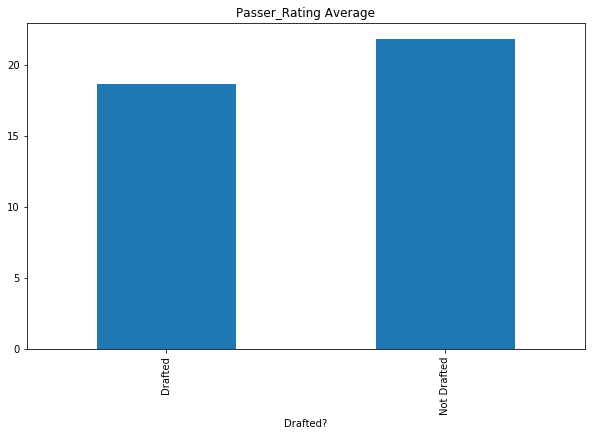

CompletionsperGame Summary:
count   5492.00
mean       1.22
std        4.91
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       39.33
Name: CompletionsperGame, dtype: float64
----------------------------------------
CompletionsperGame Drafted vs Not Drafted
                    CompletionsperGame
DraftedvNotDrafted                    
Drafted                           1.19
Not Drafted                       1.29


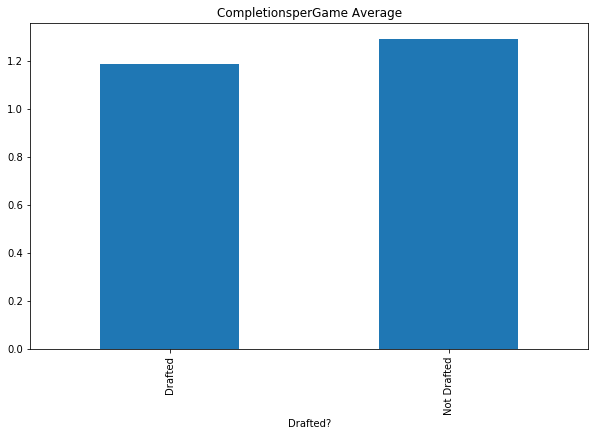

Pass_AttemptsperGame Summary:
count   5492.00
mean       1.96
std        7.82
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       58.44
Name: Pass_AttemptsperGame, dtype: float64
----------------------------------------
Pass_AttemptsperGame Drafted vs Not Drafted
                    Pass_AttemptsperGame
DraftedvNotDrafted                      
Drafted                             1.89
Not Drafted                         2.12


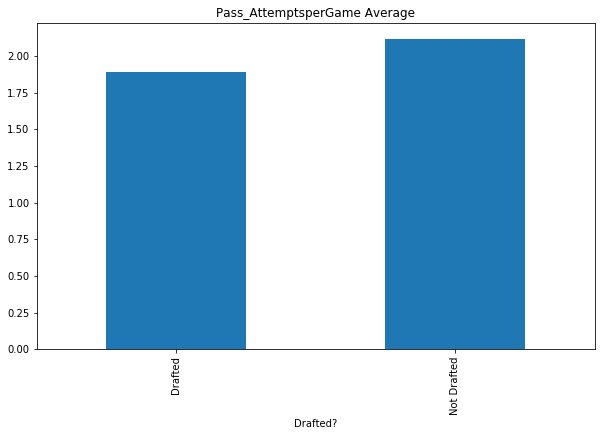

Pass_YardsperGame Summary:
count   5492.00
mean      15.52
std       61.94
min       -0.64
25%        0.00
50%        0.00
75%        0.00
max      448.69
Name: Pass_YardsperGame, dtype: float64
----------------------------------------
Pass_YardsperGame Drafted vs Not Drafted
                    Pass_YardsperGame
DraftedvNotDrafted                   
Drafted                         15.20
Not Drafted                     16.21


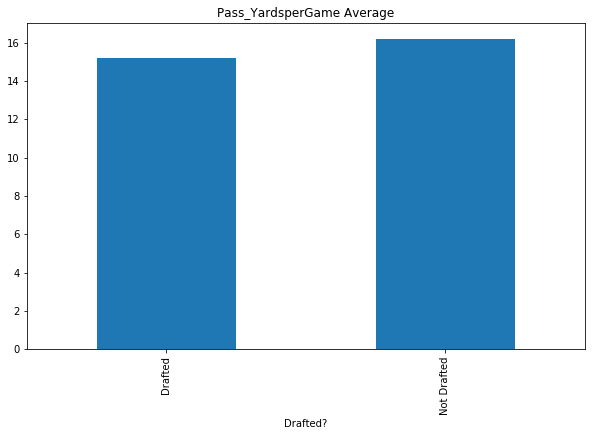

Pass_TDsperGame Summary:
count   5492.00
mean       0.12
std        0.50
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        4.00
Name: Pass_TDsperGame, dtype: float64
----------------------------------------
Pass_TDsperGame Drafted vs Not Drafted
                    Pass_TDsperGame
DraftedvNotDrafted                 
Drafted                        0.12
Not Drafted                    0.12


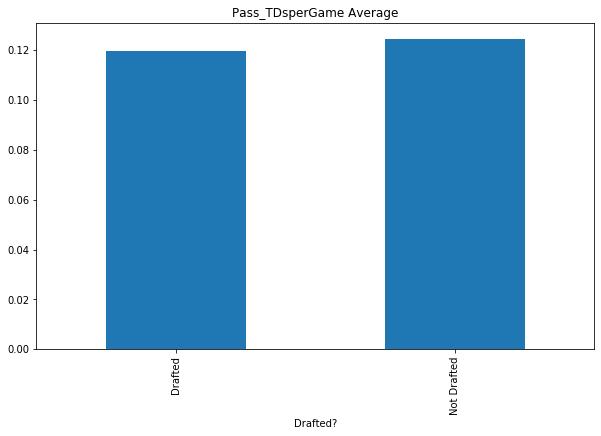

Pass_InterceptionsperGame Summary:
count   5492.00
mean       0.05
std        0.20
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.70
Name: Pass_InterceptionsperGame, dtype: float64
----------------------------------------
Pass_InterceptionsperGame Drafted vs Not Drafted
                    Pass_InterceptionsperGame
DraftedvNotDrafted                           
Drafted                                  0.05
Not Drafted                              0.06


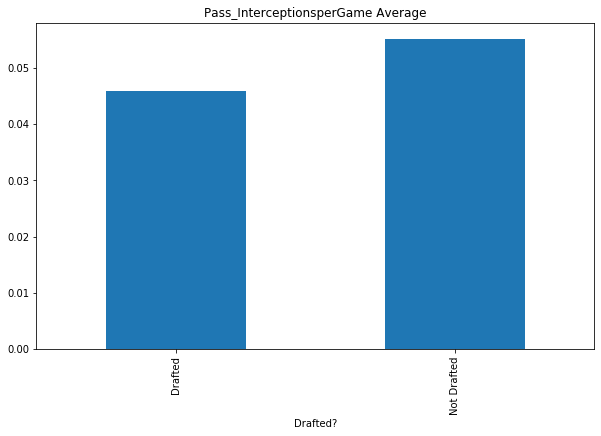

In [180]:
plot_stats_bar(df, passing_stats)

### Hypothesis Testing

#### Passing Games
H0: The average number of passing games played is the same between drafted and not drafted.

H1: The average number of passing games played is not the same between drafted and not drafted.


####  Completions

H0: The average number of completions is the same between drafted and not drafted

H1: The average number of completions is not the same between drafted and not drafted.


####  Attempts

H0: The average number of attempts is the same between drafted and not drafted

H1: The average number of attempts is not the same between drafted and not drafted.


####  Completion Percent

H0: The average completion percent is the same among the different draft picks.

H1: The average completion percent is not the same between drafted and not drafted.


####  Passing Yards

H0: The average number of passing yards is the same between drafted and not drafted.

H1: The average number of passing yards is not the same between drafted and not drafted.


####  Passing Yards per Attempt

H0: The average number of passing yards per attempt is the same between drafted and not drafted

H1: The average number of passing yards per attempt is not the same between drafted and not drafted.


#### Adjusted Passing Yards per Attempt

H0: The average number of adjusted passing yards per attempt is the same between drafted and not drafted

H1: The average number of adjusted passing yards per attempt is not the same between drafted and not drafted.


#### Pass TDs

H0: The average number of pass TDs is the same between drafted and not drafted.

H1: The average number of pass TDs is not the same between drafted and not drafted.


#### Pass Interceptions

H0: The average number of thrown interceptions is the same between drafted and not drafted.

H1: The average number of thrown interceptions is not the same between drafted and not drafted.


#### Passer Rating

H0: The average passer rating is the same between drafted and not drafted.

H1: The average passer rating is not the same between drafted and not drafted.


####  Completions per Game

H0: The average number of completions per game is the same between drafted and not drafted.

H1: The average number of completions per game is not the same between drafted and not drafted.


####  Attempts per Game

H0: The average number of attempts per game is the same between drafted and not drafted.

H1: The average number of attempts per game is not the same between drafted and not drafted.


#### Pass Yards per Game

H0: The average passing yards per game is the same between drafted and not drafted.

H1: The average passing yards per game is not the same between drafted and not drafted.


####  Thrown TDs per Game

H0: The average number of thrown TDs per game is the same between drafted and not drafted.

H1: The average number of thrown TDs per game is not the same between drafted and not drafted.


####  Thrown Interceptions per Game

H0: The average number of thrown interceptions per game is the same between drafted and not drafted.

H1: The average number of thrown interceptions per game is not the same between drafted and not drafted.

In [181]:
for i in passing_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df, i)
    print('')
    print('*' * 40)

Passing_Games T Test:
----------------------------------------
T-stastistic:  -3.4401048853984135
P-value:  0.0005858186193422876
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Completions T Test:
----------------------------------------
T-stastistic:  -0.5395612708339479
P-value:  0.5895215137058153
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Pass_Attempts T Test:
----------------------------------------
T-stastistic:  -0.8071937804745076
P-value:  0.41958981709617094
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Completion_Percent T Test:
----------------------------------------
T-stastistic:  -1.9109355572745361
P-value:  0.05606489057405319
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Pass_Yards T Tes

In this instance, only 'Passing_Games' is statistically significant between drafted & not drafted. I can exclude the other columns from my feature list.

### College Stats - Rushing & Receiving

In [183]:
rushing_stats = ['Rush_Rec_Games', 'Rush_Attempts', 'Rush_Yds', 'Rush_Yds_per_Attempt', 'Rush_TDs', 
                 'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 'Rec_TDs', 'Plays_from_Scrimmage', 'Scrimmage_Yds',
                 'Scrimmage_Yds_per_Attempt', 'Scrimmage_TDs', 'Rush_AttemptsperGame', 'Rush_YdsperGame', 
                 'Rush_TDsperGame', 'ReceptionsperGame', 'Rec_YdsperGame', 'Rec_TDsperGame', 
                 'Plays_from_ScrimmageperGame', 'Scrimmage_YdsperGame', 'Scrimmage_TDsperGame']

In [184]:
df[rushing_stats].describe()

,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,2.70,25.63,122.71,0.87,1.37,2.31,21.68,1.20,0.13,27.95,144.38,0.94,1.51,2.17,10.40,0.12,0.20,1.84,0.01,2.37,12.23,0.13
std,5.05,67.33,363.94,2.98,3.93,7.92,78.72,3.70,0.62,73.13,420.16,3.11,4.26,5.62,30.27,0.33,0.66,6.53,0.05,6.10,34.95,0.35
min,0.00,0.00,-306.00,-16.00,0.00,0.00,-16.00,-16.00,0.00,0.00,-306.00,-16.00,0.00,0.00,-25.50,0.00,0.00,-1.23,0.00,0.00,-25.50,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,450.00,2587.00,57.00,31.00,98.00,1017.00,63.00,11.00,474.00,2809.00,57.00,32.00,33.55,196.18,3.00,8.36,78.83,0.79,34.45,200.75,3.00


Rush_Rec_Games Summary:
count   5492.00
mean       2.70
std        5.05
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       15.00
Name: Rush_Rec_Games, dtype: float64
----------------------------------------
Rush_Rec_Games Drafted vs Not Drafted
                    Rush_Rec_Games
DraftedvNotDrafted                
Drafted                       2.51
Not Drafted                   3.10


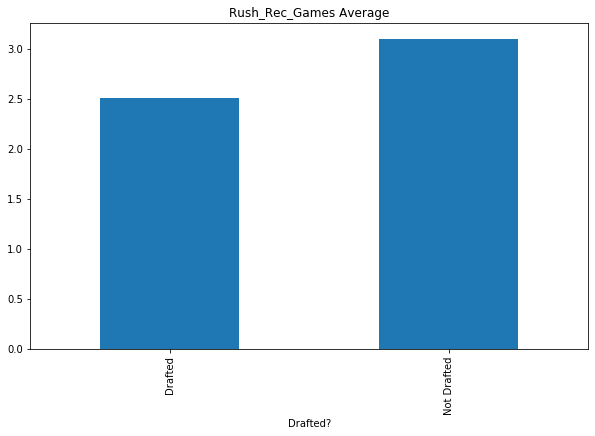

Rush_Attempts Summary:
count   5492.00
mean      25.63
std       67.33
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      450.00
Name: Rush_Attempts, dtype: float64
----------------------------------------
Rush_Attempts Drafted vs Not Drafted
                    Rush_Attempts
DraftedvNotDrafted               
Drafted                     25.39
Not Drafted                 26.17


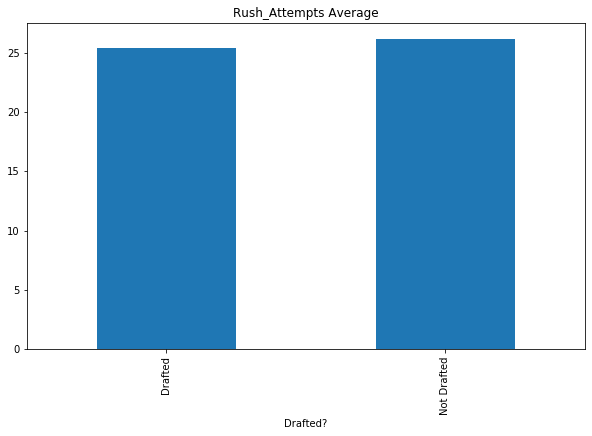

Rush_Yds Summary:
count   5492.00
mean     122.71
std      363.94
min     -306.00
25%        0.00
50%        0.00
75%        0.00
max     2587.00
Name: Rush_Yds, dtype: float64
----------------------------------------
Rush_Yds Drafted vs Not Drafted
                    Rush_Yds
DraftedvNotDrafted          
Drafted               125.70
Not Drafted           116.23


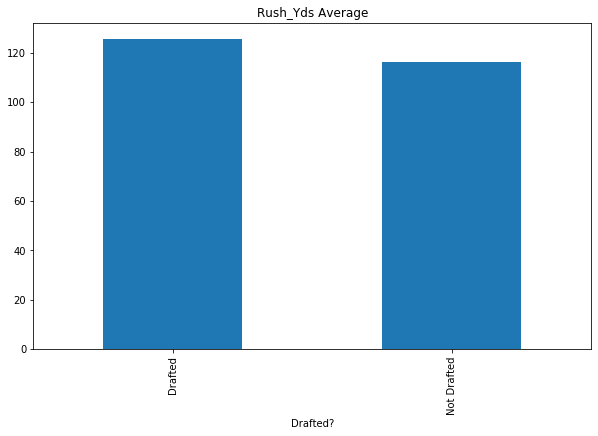

Rush_Yds_per_Attempt Summary:
count   5492.00
mean       0.87
std        2.98
min      -16.00
25%        0.00
50%        0.00
75%        0.00
max       57.00
Name: Rush_Yds_per_Attempt, dtype: float64
----------------------------------------
Rush_Yds_per_Attempt Drafted vs Not Drafted
                    Rush_Yds_per_Attempt
DraftedvNotDrafted                      
Drafted                             0.84
Not Drafted                         0.92


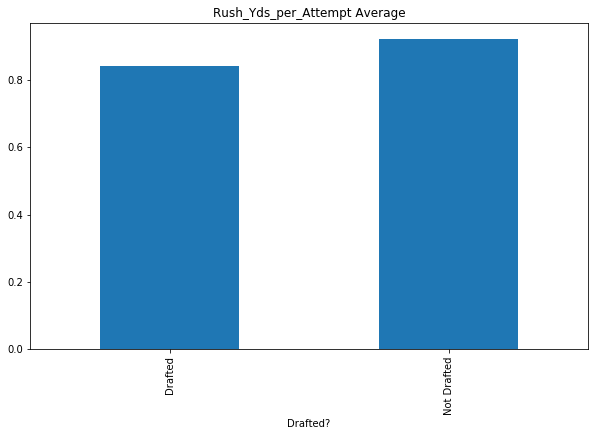

Rush_TDs Summary:
count   5492.00
mean       1.37
std        3.93
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       31.00
Name: Rush_TDs, dtype: float64
----------------------------------------
Rush_TDs Drafted vs Not Drafted
                    Rush_TDs
DraftedvNotDrafted          
Drafted                 1.41
Not Drafted             1.30


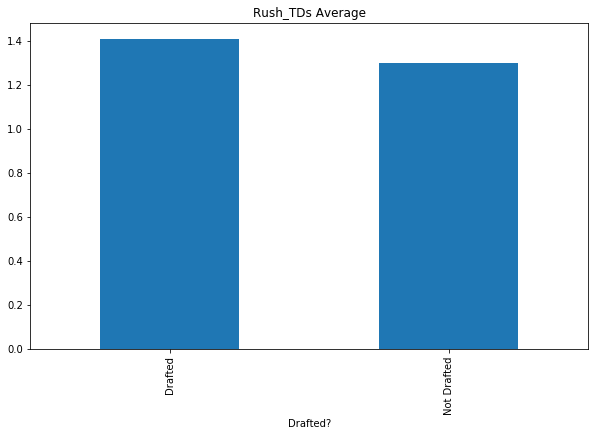

Receptions Summary:
count   5492.00
mean       2.31
std        7.92
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       98.00
Name: Receptions, dtype: float64
----------------------------------------
Receptions Drafted vs Not Drafted
                    Receptions
DraftedvNotDrafted            
Drafted                   2.23
Not Drafted               2.48


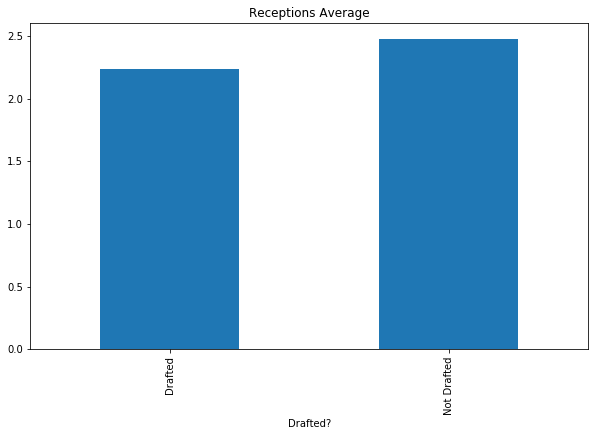

Rec_Yds Summary:
count   5492.00
mean      21.68
std       78.72
min      -16.00
25%        0.00
50%        0.00
75%        0.00
max     1017.00
Name: Rec_Yds, dtype: float64
----------------------------------------
Rec_Yds Drafted vs Not Drafted
                    Rec_Yds
DraftedvNotDrafted         
Drafted               21.65
Not Drafted           21.74


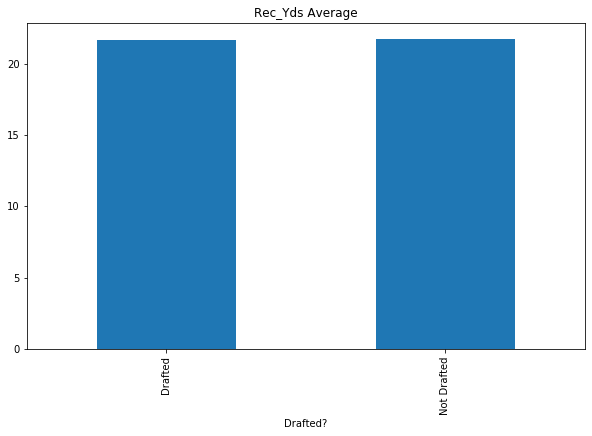

Rec_Yds_per_Reception Summary:
count   5492.00
mean       1.20
std        3.70
min      -16.00
25%        0.00
50%        0.00
75%        0.00
max       63.00
Name: Rec_Yds_per_Reception, dtype: float64
----------------------------------------
Rec_Yds_per_Reception Drafted vs Not Drafted
                    Rec_Yds_per_Reception
DraftedvNotDrafted                       
Drafted                              1.18
Not Drafted                          1.22


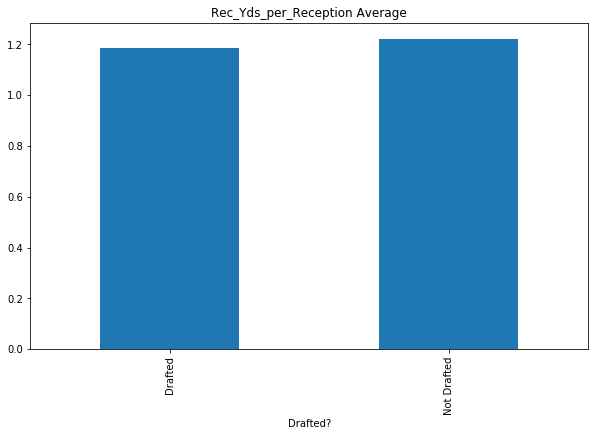

Rec_TDs Summary:
count   5492.00
mean       0.13
std        0.62
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       11.00
Name: Rec_TDs, dtype: float64
----------------------------------------
Rec_TDs Drafted vs Not Drafted
                    Rec_TDs
DraftedvNotDrafted         
Drafted                0.14
Not Drafted            0.12


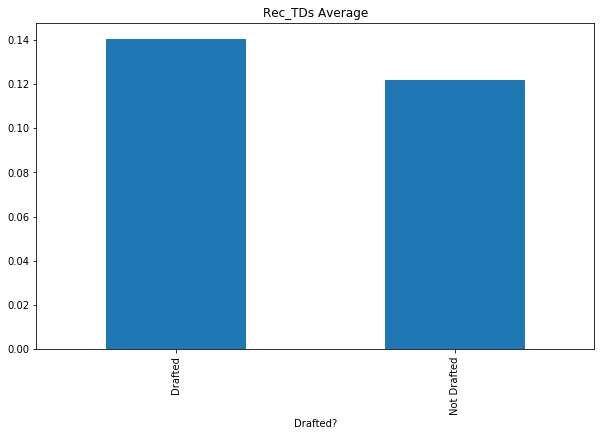

Plays_from_Scrimmage Summary:
count   5492.00
mean      27.95
std       73.13
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      474.00
Name: Plays_from_Scrimmage, dtype: float64
----------------------------------------
Plays_from_Scrimmage Drafted vs Not Drafted
                    Plays_from_Scrimmage
DraftedvNotDrafted                      
Drafted                            27.62
Not Drafted                        28.65


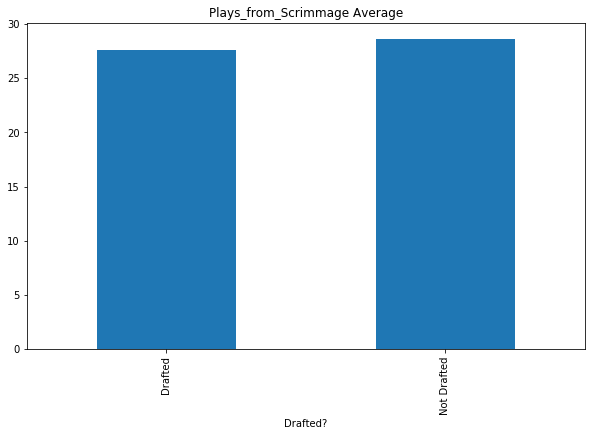

Scrimmage_Yds Summary:
count   5492.00
mean     144.38
std      420.16
min     -306.00
25%        0.00
50%        0.00
75%        0.00
max     2809.00
Name: Scrimmage_Yds, dtype: float64
----------------------------------------
Scrimmage_Yds Drafted vs Not Drafted
                    Scrimmage_Yds
DraftedvNotDrafted               
Drafted                    147.35
Not Drafted                137.97


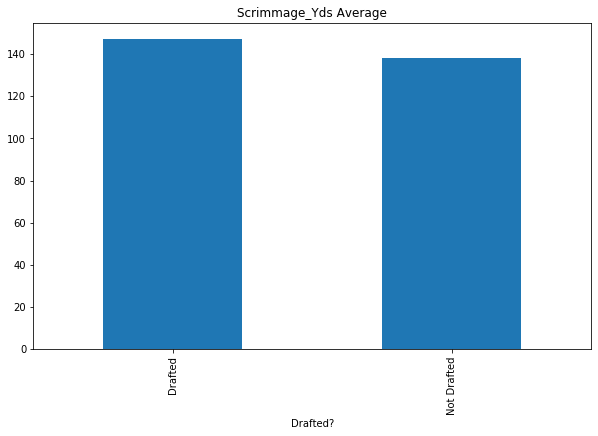

Scrimmage_Yds_per_Attempt Summary:
count   5492.00
mean       0.94
std        3.11
min      -16.00
25%        0.00
50%        0.00
75%        0.00
max       57.00
Name: Scrimmage_Yds_per_Attempt, dtype: float64
----------------------------------------
Scrimmage_Yds_per_Attempt Drafted vs Not Drafted
                    Scrimmage_Yds_per_Attempt
DraftedvNotDrafted                           
Drafted                                  0.91
Not Drafted                              1.02


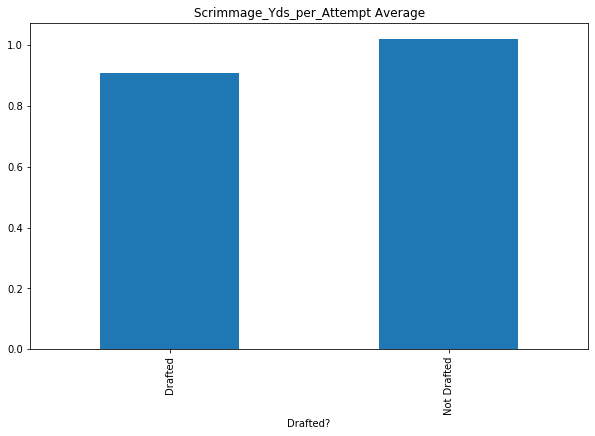

Scrimmage_TDs Summary:
count   5492.00
mean       1.51
std        4.26
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       32.00
Name: Scrimmage_TDs, dtype: float64
----------------------------------------
Scrimmage_TDs Drafted vs Not Drafted
                    Scrimmage_TDs
DraftedvNotDrafted               
Drafted                      1.55
Not Drafted                  1.42


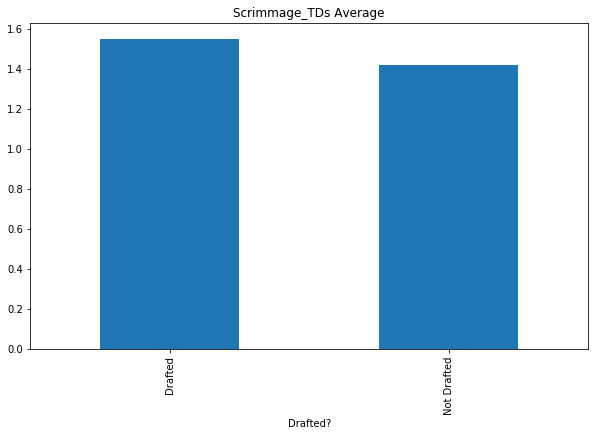

Rush_AttemptsperGame Summary:
count   5492.00
mean       2.17
std        5.62
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       33.55
Name: Rush_AttemptsperGame, dtype: float64
----------------------------------------
Rush_AttemptsperGame Drafted vs Not Drafted
                    Rush_AttemptsperGame
DraftedvNotDrafted                      
Drafted                             2.12
Not Drafted                         2.29


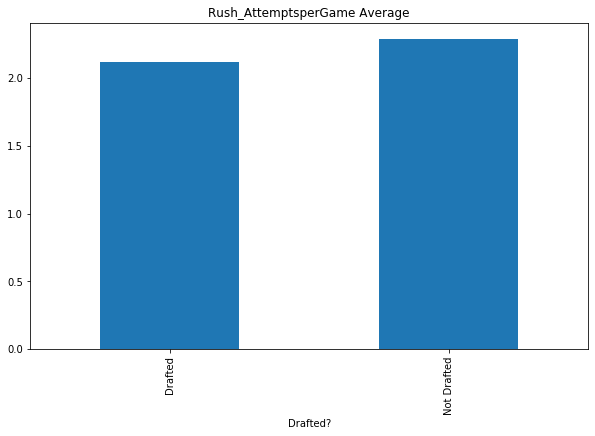

Rush_YdsperGame Summary:
count   5492.00
mean      10.40
std       30.27
min      -25.50
25%        0.00
50%        0.00
75%        0.00
max      196.18
Name: Rush_YdsperGame, dtype: float64
----------------------------------------
Rush_YdsperGame Drafted vs Not Drafted
                    Rush_YdsperGame
DraftedvNotDrafted                 
Drafted                       10.49
Not Drafted                   10.19


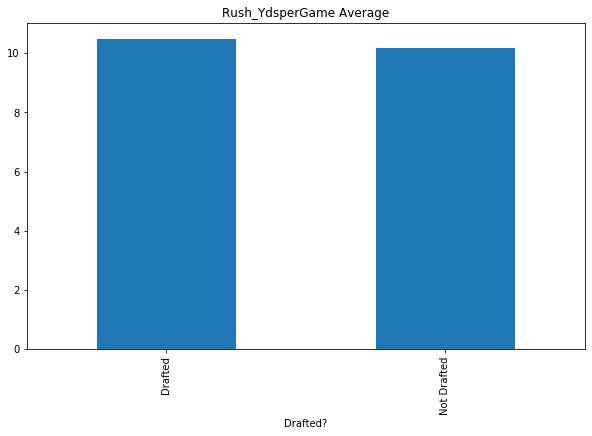

Rush_TDsperGame Summary:
count   5492.00
mean       0.12
std        0.33
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: Rush_TDsperGame, dtype: float64
----------------------------------------
Rush_TDsperGame Drafted vs Not Drafted
                    Rush_TDsperGame
DraftedvNotDrafted                 
Drafted                        0.12
Not Drafted                    0.11


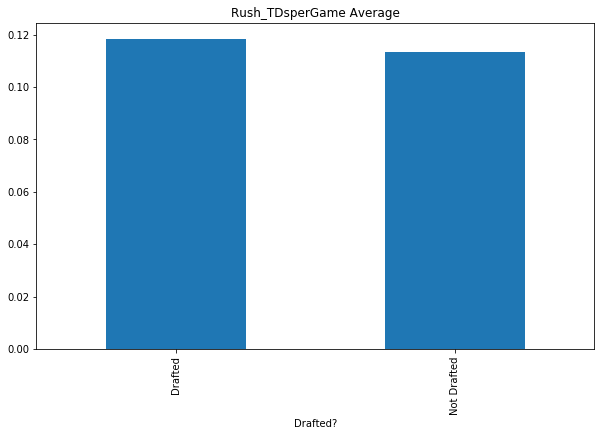

ReceptionsperGame Summary:
count   5492.00
mean       0.20
std        0.66
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        8.36
Name: ReceptionsperGame, dtype: float64
----------------------------------------
ReceptionsperGame Drafted vs Not Drafted
                    ReceptionsperGame
DraftedvNotDrafted                   
Drafted                          0.19
Not Drafted                      0.22


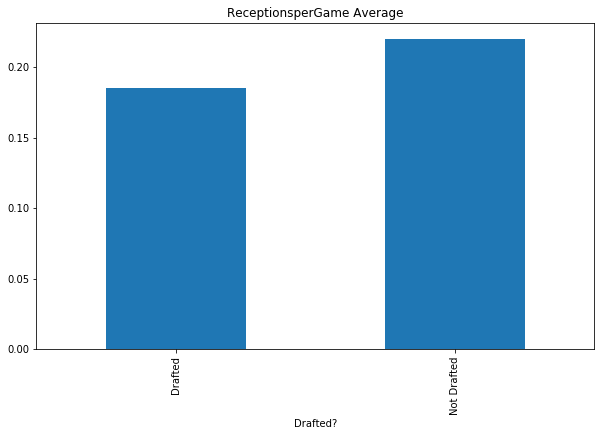

Rec_YdsperGame Summary:
count   5492.00
mean       1.84
std        6.53
min       -1.23
25%        0.00
50%        0.00
75%        0.00
max       78.83
Name: Rec_YdsperGame, dtype: float64
----------------------------------------
Rec_YdsperGame Drafted vs Not Drafted
                    Rec_YdsperGame
DraftedvNotDrafted                
Drafted                       1.79
Not Drafted                   1.94


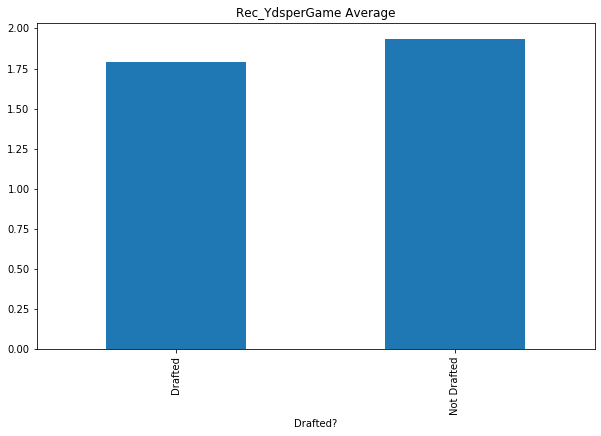

Rec_TDsperGame Summary:
count   5492.00
mean       0.01
std        0.05
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.79
Name: Rec_TDsperGame, dtype: float64
----------------------------------------
Rec_TDsperGame Drafted vs Not Drafted
                    Rec_TDsperGame
DraftedvNotDrafted                
Drafted                       0.01
Not Drafted                   0.01


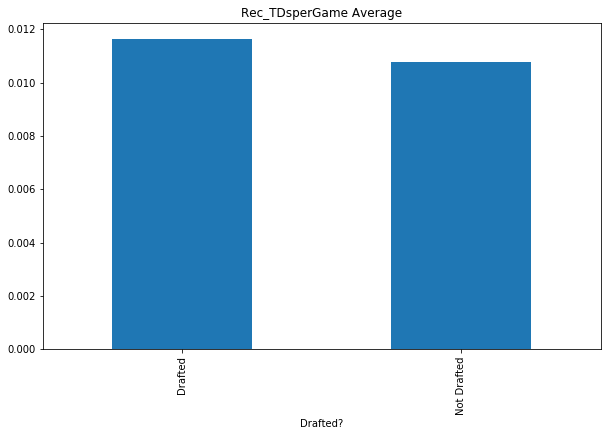

Plays_from_ScrimmageperGame Summary:
count   5492.00
mean       2.37
std        6.10
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       34.45
Name: Plays_from_ScrimmageperGame, dtype: float64
----------------------------------------
Plays_from_ScrimmageperGame Drafted vs Not Drafted
                    Plays_from_ScrimmageperGame
DraftedvNotDrafted                             
Drafted                                    2.30
Not Drafted                                2.51


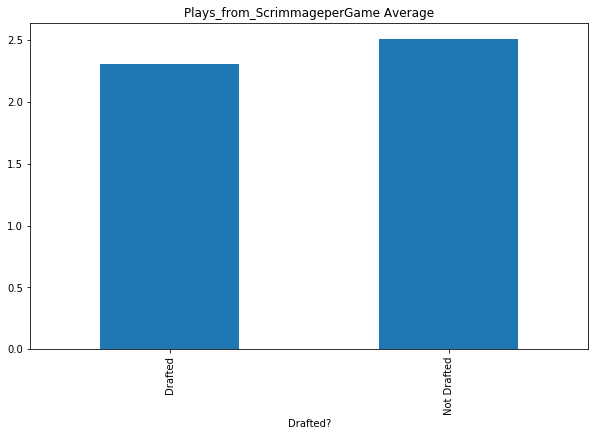

Scrimmage_YdsperGame Summary:
count   5492.00
mean      12.23
std       34.95
min      -25.50
25%        0.00
50%        0.00
75%        0.00
max      200.75
Name: Scrimmage_YdsperGame, dtype: float64
----------------------------------------
Scrimmage_YdsperGame Drafted vs Not Drafted
                    Scrimmage_YdsperGame
DraftedvNotDrafted                      
Drafted                            12.28
Not Drafted                        12.13


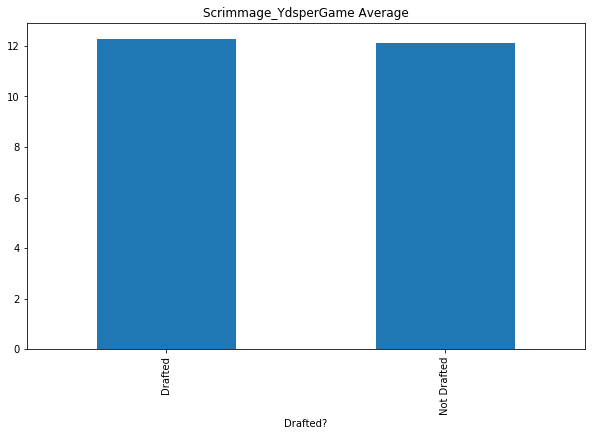

Scrimmage_TDsperGame Summary:
count   5492.00
mean       0.13
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: Scrimmage_TDsperGame, dtype: float64
----------------------------------------
Scrimmage_TDsperGame Drafted vs Not Drafted
                    Scrimmage_TDsperGame
DraftedvNotDrafted                      
Drafted                             0.13
Not Drafted                         0.12


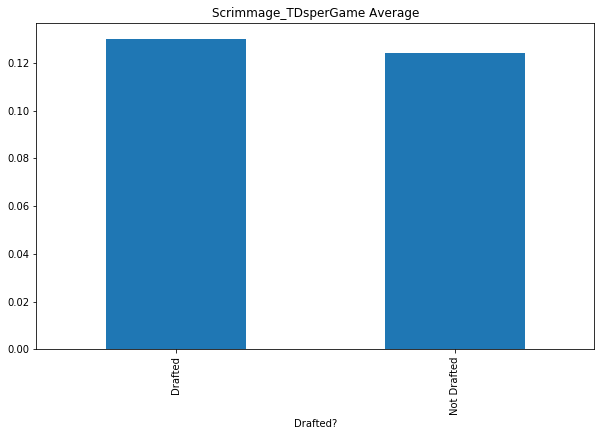

In [185]:
plot_stats_bar(df, rushing_stats)

### Hypothesis Testing

#### Rushing & Receiving Games
H0: The average number of rushing and receiving games is the same between drafted and not drafted.

H1: The average number of rushing and receiving games is not the same between drafted and not drafted.


#### Rush Attempts
H0: The average rushing attempts is the same between drafted and not drafted.

H1: The average rushing attempts is not the same between drafted and not drafted.


#### Rush Yards
H0: The average rushing yards is the same between drafted and not drafted.

H1: The average rushing yards is not the same between drafted and not drafted.


#### Rush Yards per Attempt
H0: The average rushing yards per attempt is the same between drafted and not drafted.

H1: The average rushing yards per attempt is not the same between drafted and not drafted.


#### Rush TDs
H0: The average number of rushing touchdowns is the same between drafted and not drafted.

H1: The average number of rushing touchdowns is not the same between drafted and not drafted.


#### Receptions
H0: The average number of receptions is the same between drafted and not drafted.

H1: The average number of receptions is not the same between drafted and not drafted.


#### Reception Yds
H0: The average number of reception yards is the same between drafted and not drafted.

H1: The average number of reception yards is not the same between drafted and not drafted.


#### Recption Yards per Attempt
H0: The average reception yards per attempt is the same between drafted and not drafted.

H1: The average reception yards per attempt is not the same between drafted and not drafted.


#### Reception TDs
H0: The average number of reception touchdowns is the same between drafted and not drafted.

H1: The average number of reception touchdowns is not the same between drafted and not drafted.


#### Plays from Scrimmage
H0: The average number of plays from scrimamge is the same between drafted and not drafted.

H1: The average number of plays from scrimmage is not the same between drafted and not drafted.


#### Scrimmage Yds
H0: The average number of scrimmage yards is the same between drafted and not drafted.

H1: The average number of scrimmage yards is not the same between drafted and not drafted.


#### Scrimmage Yds per Attempt
H0: The average number of scrimmage yards per attempt is the same between drafted and not drafted.

H1: The average number of scrimmage yards per attempt is not the same between drafted and not drafted.


#### TDs from Scrimmage
H0: The average number of TDs from scrimmage is the same between drafted and not drafted.

H1: The average number of TDs from scrimmage is not the same between drafted and not drafted.


#### Rush Attempts per Game
H0: The average number of rush attempts per game is the same between drafted and not drafted.

H1: The average number of rush attempts per game is not the same between drafted and not drafted.


#### Rush Yds per Game
H0: The average number of rush yards per game is the same between drafted and not drafted.

H1: The average number of rush yards per game is not the same between drafted and not drafted.


#### Rush TDs per Game
H0: The average number of rush TDs per game is the same between drafted and not drafted.

H1: The average number of rush TDs per game is not the same between drafted and not drafted.


#### Receptions per Game
H0: The average number of receptions per game is the same between drafted and not drafted.

H1: The average number of receptions per game is not the same between drafted and not drafted.


#### Reception Yds per Game
H0: The average number of reception yards per game is the same between drafted and not drafted.

H1: The average number of reception yards per game is not the same between drafted and not drafted.


#### Reception TDs per Game
H0: The average number of reception TDs per game is the same between drafted and not drafted.

H1: The average number of reception TDs per game is not the same between drafted and not drafted.


#### Plays from Scrimmage per Game
H0: The average number of plays from scrimmage per game is the same between drafted and not drafted.

H1: The average number of plays from scrimmage per game is not the same between drafted and not drafted.


#### Scrimmage Yds per Game
H0: The average number of scrimmage yards per game is the same between drafted and not drafted.

H1: The average number of scrimmage yards per game is not the same between drafted and not drafted.

#### Scrimmage TDs per Game
H0: The average number of scrimmage TDs per game is the same between drafted and not drafted.

H1: The average number of scrimmage TDs per game is not the same between drafted and not drafted.

In [187]:
for i in rushing_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df, i)
    print('')
    print('*' * 40)

Rush_Rec_Games T Test:
----------------------------------------
T-stastistic:  -4.060785107458773
P-value:  4.958891894685637e-05
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Rush_Attempts T Test:
----------------------------------------
T-stastistic:  -0.40222644698678295
P-value:  0.6875330391647947
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Rush_Yds T Test:
----------------------------------------
T-stastistic:  0.8962816949613035
P-value:  0.3701416308136195
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Rush_Yds_per_Attempt T Test:
----------------------------------------
T-stastistic:  -0.943341441606901
P-value:  0.34554779549744585
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Rush_TDs T Test:
--

Once again, the only statistically significant feature is the number of rushing & receiving games. I'll be sure to include that when I set my features.

### College Stats - Defense

In [189]:
defense_stats = ['Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                 'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes', 
                 'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles', 
                 'Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                 'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                 'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                 'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame']

In [190]:
df[defense_stats].describe()

,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,9.00,13.60,9.07,22.67,2.74,1.12,0.62,8.83,3.93,0.07,0.92,0.13,1.06,0.04,0.27,inf,inf,inf,inf,inf,0.05,0.74,0.01,inf,inf,inf,inf,inf
std,5.40,19.86,14.64,33.29,4.89,2.52,1.32,24.66,10.30,0.30,2.33,0.44,7.72,0.20,0.77,nan,nan,nan,nan,nan,0.11,2.16,0.03,nan,nan,nan,nan,nan
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-10.00,-8.00,0.00,0.00,0.00,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-8.00,0.00,0.00,0.00,-0.36,0.00,0.00
25%,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,12.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,13.00,27.00,16.00,44.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.33,1.36,3.80,0.33,0.08,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,114.00,97.00,191.00,28.50,20.00,14.00,280.00,100.00,4.00,23.00,4.00,184.00,3.00,9.00,inf,inf,inf,inf,inf,1.25,36.50,0.40,inf,inf,inf,inf,inf


Now I added per Game metrics off to the right, but I have an issue where some of my observations don't have a number of games. I checked my function to make sure it scraped properly, but it's actually a problem, with my data. I'll have to drop these columns so they don't create a problem when I start running models.

In [191]:
defense_stats = ['Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                 'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes', 
                 'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles']

Defense_Games Summary:
count   5492.00
mean       9.00
std        5.40
min        0.00
25%        2.00
50%       12.00
75%       13.00
max       15.00
Name: Defense_Games, dtype: float64
----------------------------------------
Defense_Games Drafted vs Not Drafted
                    Defense_Games
DraftedvNotDrafted               
Drafted                      9.13
Not Drafted                  8.71


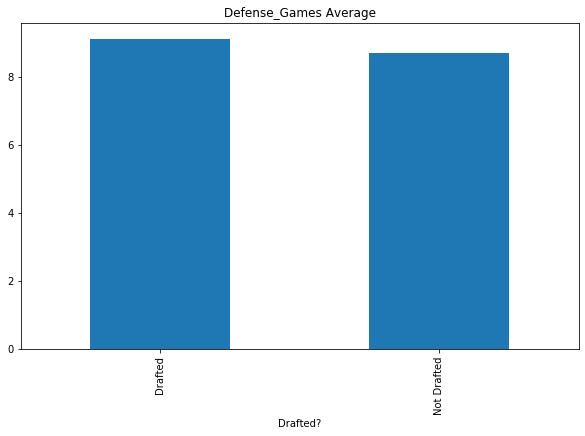

Solo_Tackles Summary:
count   5492.00
mean      13.60
std       19.86
min        0.00
25%        0.00
50%        1.00
75%       27.00
max      114.00
Name: Solo_Tackles, dtype: float64
----------------------------------------
Solo_Tackles Drafted vs Not Drafted
                    Solo_Tackles
DraftedvNotDrafted              
Drafted                    14.49
Not Drafted                11.68


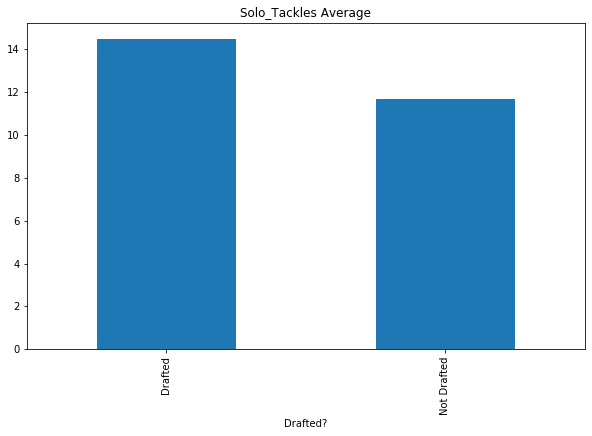

Assisted_Tackles Summary:
count   5492.00
mean       9.07
std       14.64
min        0.00
25%        0.00
50%        0.00
75%       16.00
max       97.00
Name: Assisted_Tackles, dtype: float64
----------------------------------------
Assisted_Tackles Drafted vs Not Drafted
                    Assisted_Tackles
DraftedvNotDrafted                  
Drafted                         9.52
Not Drafted                     8.09


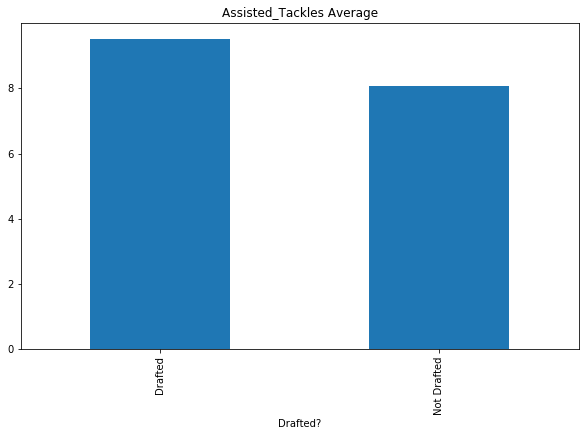

Ttl_Tackles Summary:
count   5492.00
mean      22.67
std       33.29
min        0.00
25%        0.00
50%        1.00
75%       44.00
max      191.00
Name: Ttl_Tackles, dtype: float64
----------------------------------------
Ttl_Tackles Drafted vs Not Drafted
                    Ttl_Tackles
DraftedvNotDrafted             
Drafted                   24.01
Not Drafted               19.77


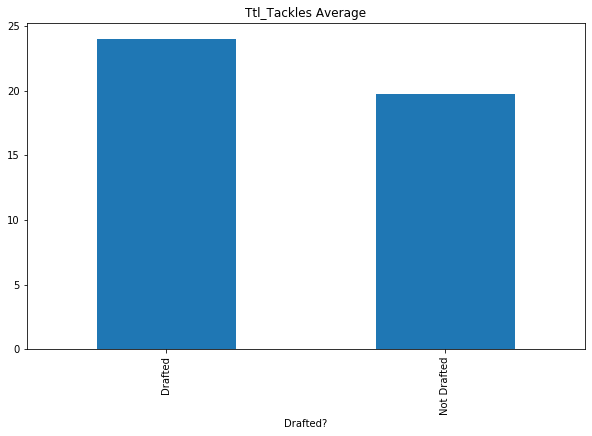

Loss Summary:
count   5492.00
mean       2.74
std        4.89
min        0.00
25%        0.00
50%        0.00
75%        4.00
max       28.50
Name: Loss, dtype: float64
----------------------------------------
Loss Drafted vs Not Drafted
                    Loss
DraftedvNotDrafted      
Drafted             3.08
Not Drafted         1.99


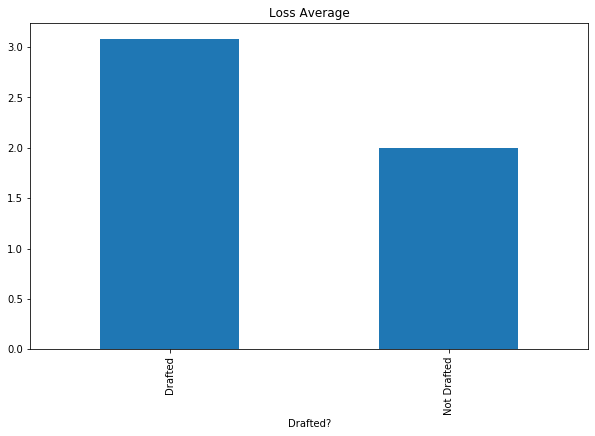

Sacks Summary:
count   5492.00
mean       1.12
std        2.52
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       20.00
Name: Sacks, dtype: float64
----------------------------------------
Sacks Drafted vs Not Drafted
                    Sacks
DraftedvNotDrafted       
Drafted              1.29
Not Drafted          0.74


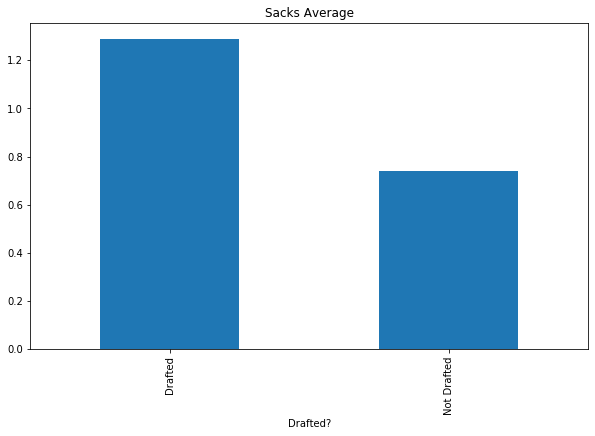

Defensive_Interceptions Summary:
count   5492.00
mean       0.62
std        1.32
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       14.00
Name: Defensive_Interceptions, dtype: float64
----------------------------------------
Defensive_Interceptions Drafted vs Not Drafted
                    Defensive_Interceptions
DraftedvNotDrafted                         
Drafted                                0.67
Not Drafted                            0.50


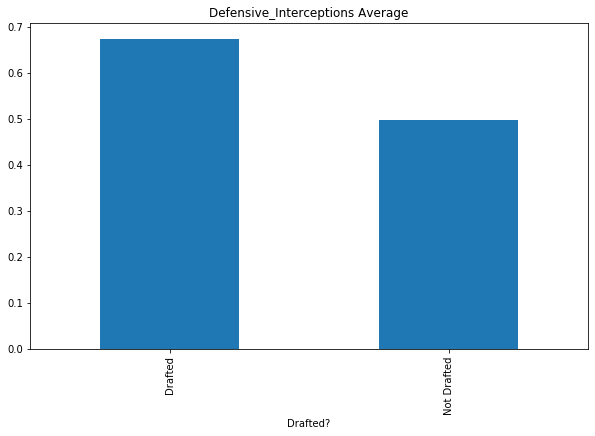

Def_Int_Yds Summary:
count   5492.00
mean       8.83
std       24.66
min      -10.00
25%        0.00
50%        0.00
75%        0.00
max      280.00
Name: Def_Int_Yds, dtype: float64
----------------------------------------
Def_Int_Yds Drafted vs Not Drafted
                    Def_Int_Yds
DraftedvNotDrafted             
Drafted                    9.77
Not Drafted                6.80


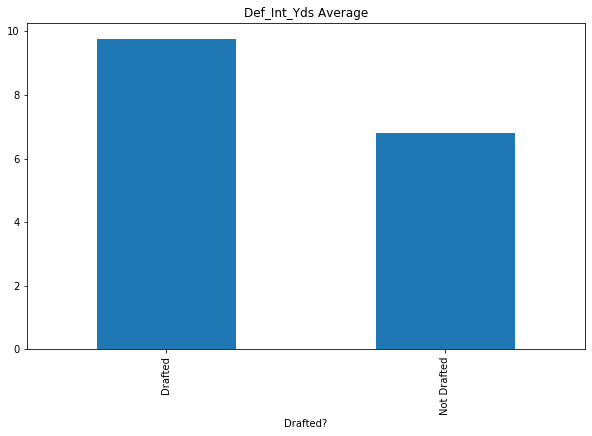

Yds_per_Int Summary:
count   5492.00
mean       3.93
std       10.30
min       -8.00
25%        0.00
50%        0.00
75%        0.00
max      100.00
Name: Yds_per_Int, dtype: float64
----------------------------------------
Yds_per_Int Drafted vs Not Drafted
                    Yds_per_Int
DraftedvNotDrafted             
Drafted                    4.18
Not Drafted                3.38


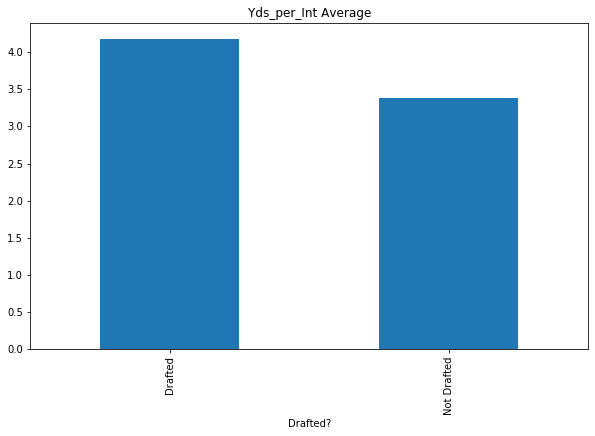

Pick_6 Summary:
count   5492.00
mean       0.07
std        0.30
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        4.00
Name: Pick_6, dtype: float64
----------------------------------------
Pick_6 Drafted vs Not Drafted
                    Pick_6
DraftedvNotDrafted        
Drafted               0.09
Not Drafted           0.05


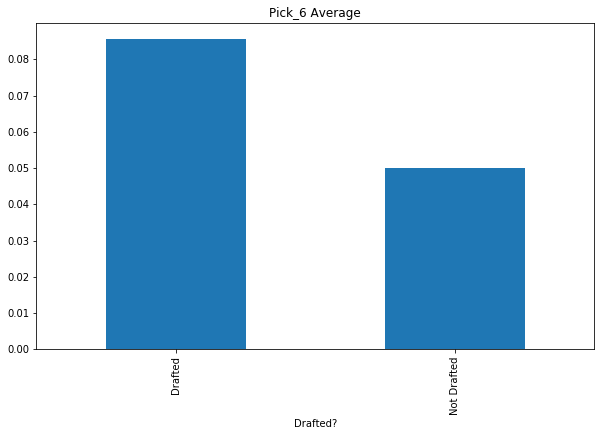

Defended_Passes Summary:
count   5492.00
mean       0.92
std        2.33
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       23.00
Name: Defended_Passes, dtype: float64
----------------------------------------
Defended_Passes Drafted vs Not Drafted
                    Defended_Passes
DraftedvNotDrafted                 
Drafted                        0.99
Not Drafted                    0.77


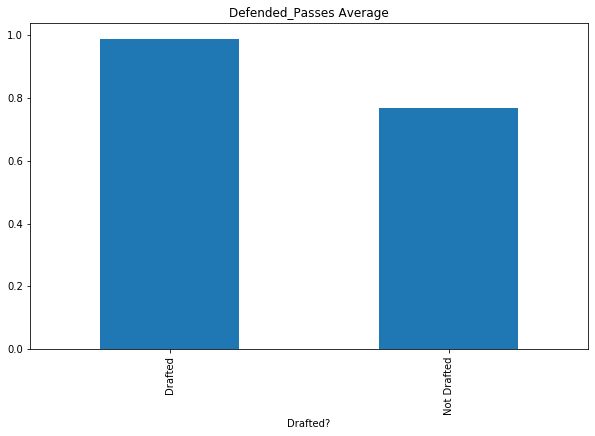

Recovered_Fumbles Summary:
count   5492.00
mean       0.13
std        0.44
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        4.00
Name: Recovered_Fumbles, dtype: float64
----------------------------------------
Recovered_Fumbles Drafted vs Not Drafted
                    Recovered_Fumbles
DraftedvNotDrafted                   
Drafted                          0.15
Not Drafted                      0.10


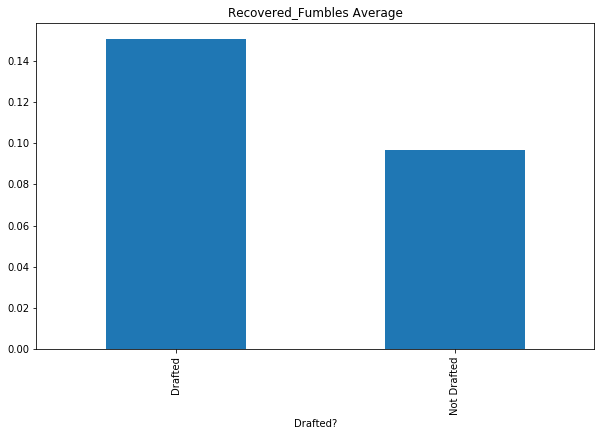

Rec_Fumbles_Yds Summary:
count   5492.00
mean       1.06
std        7.72
min       -4.00
25%        0.00
50%        0.00
75%        0.00
max      184.00
Name: Rec_Fumbles_Yds, dtype: float64
----------------------------------------
Rec_Fumbles_Yds Drafted vs Not Drafted
                    Rec_Fumbles_Yds
DraftedvNotDrafted                 
Drafted                        1.25
Not Drafted                    0.64


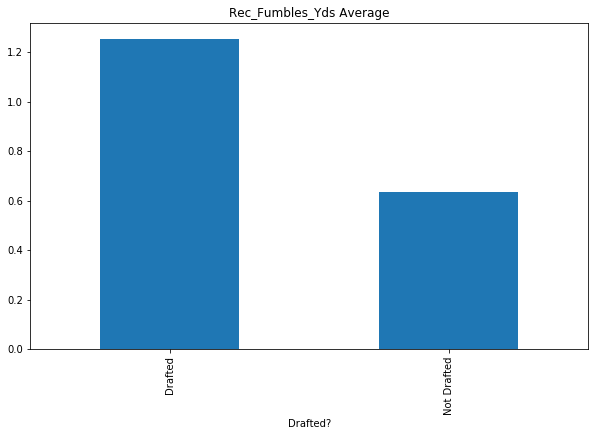

Fumbles_Returned_TD Summary:
count   5492.00
mean       0.04
std        0.20
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: Fumbles_Returned_TD, dtype: float64
----------------------------------------
Fumbles_Returned_TD Drafted vs Not Drafted
                    Fumbles_Returned_TD
DraftedvNotDrafted                     
Drafted                            0.04
Not Drafted                        0.03


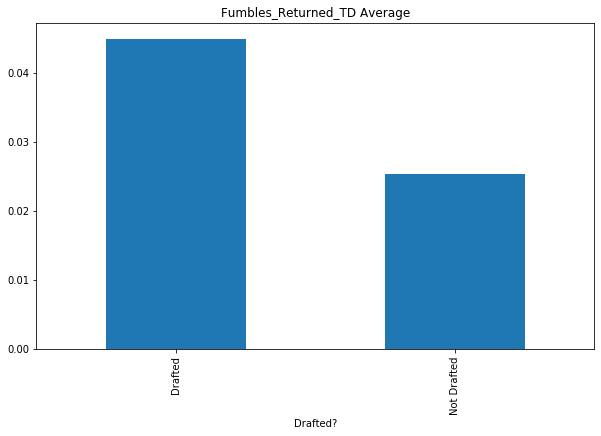

Forced_Fumbles Summary:
count   5492.00
mean       0.27
std        0.77
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        9.00
Name: Forced_Fumbles, dtype: float64
----------------------------------------
Forced_Fumbles Drafted vs Not Drafted
                    Forced_Fumbles
DraftedvNotDrafted                
Drafted                       0.30
Not Drafted                   0.19


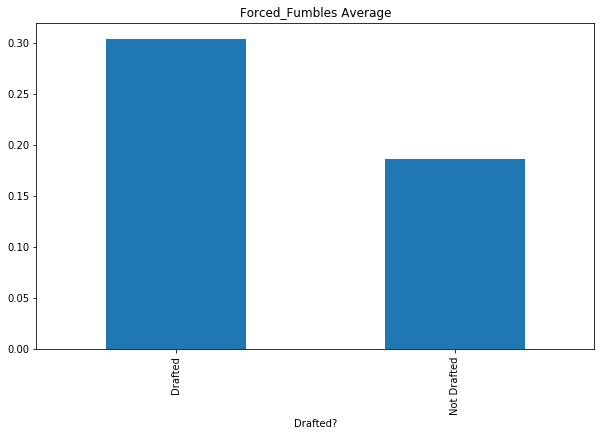

In [192]:
plot_stats_bar(df, defense_stats)

### Hypothesis Tests

#### Defense Games

H0: The average number of defense games is the same between drafted and not drafted.

H1: The average number of defense games is not the same between drafted and not drafted.


#### Solo Tackles

H0: The average number of solo tackles is the same between drafted and not drafted.

H1: The average number of solo tackles is not the same between drafted and not drafted.


#### Assisted Tackles

H0: The average number of assisted tackles is the same between drafted and not drafted.

H1: The average number of assisted tackles is not the same between drafted and not drafted.


#### Total Tackles

H0: The average number of total tackles is the same between drafted and not drafted.

H1: The average number of total tackles is not the same between drafted and not drafted.


#### Tackles for a Loss

H0: The average number of tackles for a loss is the same between drafted and not drafted.

H1: The average number of tackles for a loss is not the same between drafted and not drafted.


#### Sacks

H0: The average number of sacks by players is the same between drafted and not drafted.

H1: The average number of sacks by players is not the same between drafted and not drafted..


#### Interceptions

H0: The average number of interceptions is the same between drafted and not drafted.

H1: The average number of interceptions is not the same between drafted and not drafted.



#### Interception Yards

H0: The average number of interception yards is the same between drafted and not drafted.

H1: The average number of interception yards is not the same between drafted and not drafted.


#### Yards per Interception

H0: The average number of yards per interception is the same between drafted and not drafted.

H1: The average number of yards per interception is not the same between drafted and not drafted.


#### Pick 6

H0: The average number of pick 6's by players is the same between drafted and not drafted.

H1: The average number of pick 6's by players is not the same between drafted and not drafted.


#### Defended Passes

H0: The average number of defended passes is the same between drafted and not drafted.

H1: The average number of defended passes is not the same between drafted and not drafted.


#### Recovered Fumbles

H0: The average number of recovered fumbles is the same between drafted and not drafted.

H1: The average number of recovered fumbles is not the same between drafted and not drafted.


#### Recovered Fumble Yds

H0: The average number of recovered fumbles yards is the same between drafted and not drafted.

H1: The average number of recovered fumbles yards is not the same between drafted and not drafted.


#### Fumbles Returned for a TD

H0: The average number of fumbles recovered for a TD is the same between drafted and not drafted.

H1: The average number of fumbles recovered for a TD is not the same between drafted and not drafted.


#### Forced Fumbles

H0: The average number of forced fumbles is the same between drafted and not drafted.

H1: The average number of forced fumbles is not the same between drafted and not drafted.

In [193]:
for i in defense_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df, i)
    print('')
    print('*' * 40)

Defense_Games T Test:
----------------------------------------
T-stastistic:  2.687615511703802
P-value:  0.00721812250412451
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Solo_Tackles T Test:
----------------------------------------
T-stastistic:  4.880092016620748
P-value:  1.0903459828412559e-06
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Assisted_Tackles T Test:
----------------------------------------
T-stastistic:  3.3825119057911768
P-value:  0.0007232836975209643
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Ttl_Tackles T Test:
----------------------------------------
T-stastistic:  4.398626090135659
P-value:  1.1099837212561227e-05
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Loss T Test:
------------------------------

Welp, defense wins games. In all instances, I can reject the null hypothesis. These features will be important for my model.

### College Stats - Kicking

In [194]:
kicking_stats = ['Kicking_Games', 'XP_Made', 'XP_Attempts', 'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent', 
                 'TTL_Kicking_Points', 'NumPunts', 'Punt_Yds', 'Yds_per_Punt', 'XP_MadeperGame', 'XP_AttemptsperGame',
                 'FG_MadeperGame', 'FG_AttemptsperGame', 'TTL_Kicking_PointsperGame', 'NumPuntsperGame', 
                 'Punt_YdsperGame']

In [195]:
df[kicking_stats].describe()

,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,0.21,0.63,0.64,1.53,0.29,0.37,1.21,1.49,0.16,6.58,0.20,0.05,0.05,0.02,0.03,0.12,0.01,0.55
std,1.60,5.33,5.44,12.14,2.40,3.03,9.74,12.30,2.87,120.54,2.84,0.42,0.43,0.19,0.24,0.98,0.23,9.88
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,14.00,87.00,88.00,100.00,30.00,35.00,95.20,156.00,81.00,3259.00,48.10,6.21,6.29,2.42,2.92,12.00,6.23,271.58


Kicking_Games Summary:
count   5492.00
mean       0.21
std        1.60
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       14.00
Name: Kicking_Games, dtype: float64
----------------------------------------
Kicking_Games Drafted vs Not Drafted
                    Kicking_Games
DraftedvNotDrafted               
Drafted                      0.12
Not Drafted                  0.40


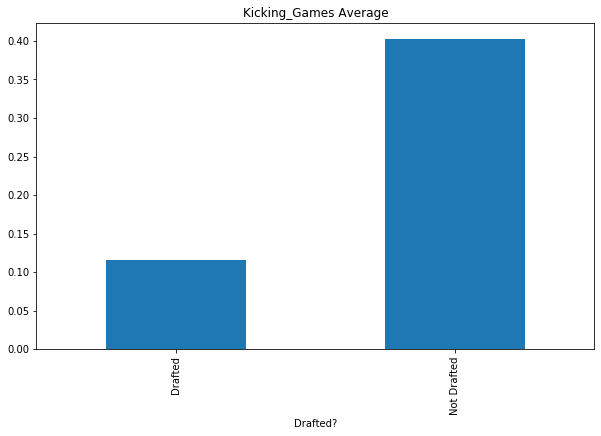

XP_Made Summary:
count   5492.00
mean       0.63
std        5.33
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       87.00
Name: XP_Made, dtype: float64
----------------------------------------
XP_Made Drafted vs Not Drafted
                    XP_Made
DraftedvNotDrafted         
Drafted                0.33
Not Drafted            1.27


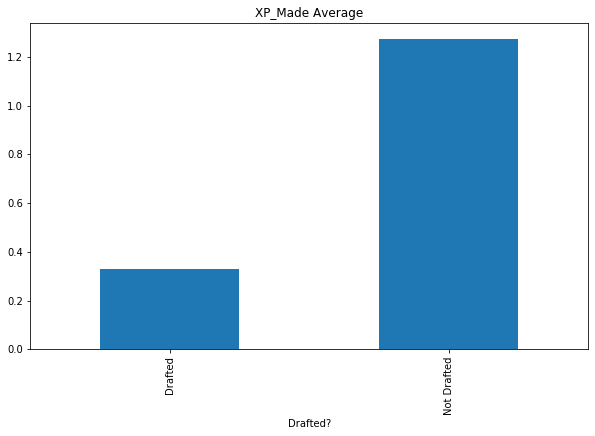

XP_Attempts Summary:
count   5492.00
mean       0.64
std        5.44
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       88.00
Name: XP_Attempts, dtype: float64
----------------------------------------
XP_Attempts Drafted vs Not Drafted
                    XP_Attempts
DraftedvNotDrafted             
Drafted                    0.33
Not Drafted                1.31


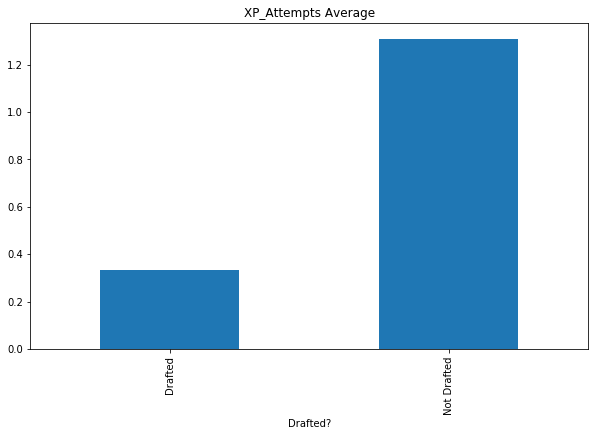

XP_Percent Summary:
count   5492.00
mean       1.53
std       12.14
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      100.00
Name: XP_Percent, dtype: float64
----------------------------------------
XP_Percent Drafted vs Not Drafted
                    XP_Percent
DraftedvNotDrafted            
Drafted                   0.81
Not Drafted               3.08


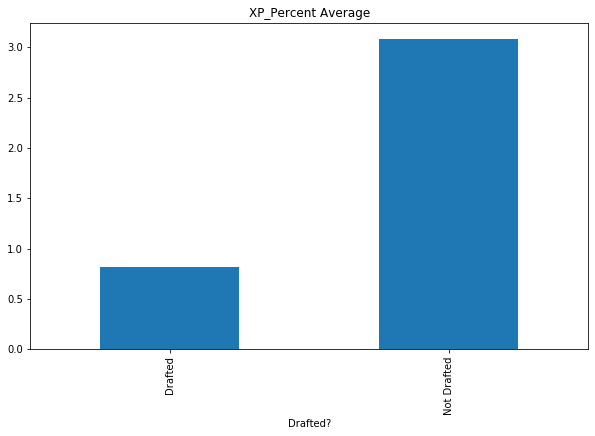

FG_Made Summary:
count   5492.00
mean       0.29
std        2.40
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       30.00
Name: FG_Made, dtype: float64
----------------------------------------
FG_Made Drafted vs Not Drafted
                    FG_Made
DraftedvNotDrafted         
Drafted                0.16
Not Drafted            0.56


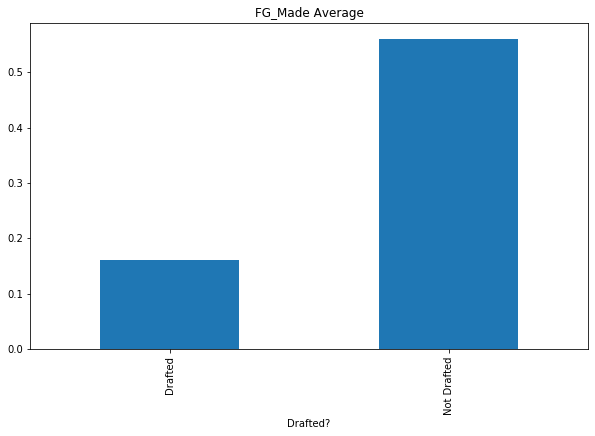

FG_Attempts Summary:
count   5492.00
mean       0.37
std        3.03
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       35.00
Name: FG_Attempts, dtype: float64
----------------------------------------
FG_Attempts Drafted vs Not Drafted
                    FG_Attempts
DraftedvNotDrafted             
Drafted                    0.20
Not Drafted                0.72


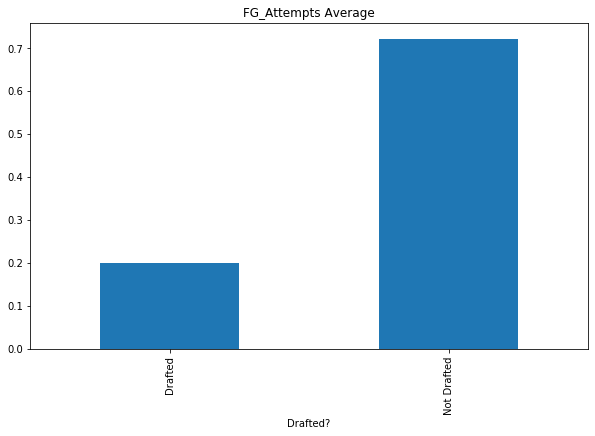

FG_Percent Summary:
count   5492.00
mean       1.21
std        9.74
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       95.20
Name: FG_Percent, dtype: float64
----------------------------------------
FG_Percent Drafted vs Not Drafted
                    FG_Percent
DraftedvNotDrafted            
Drafted                   0.64
Not Drafted               2.45


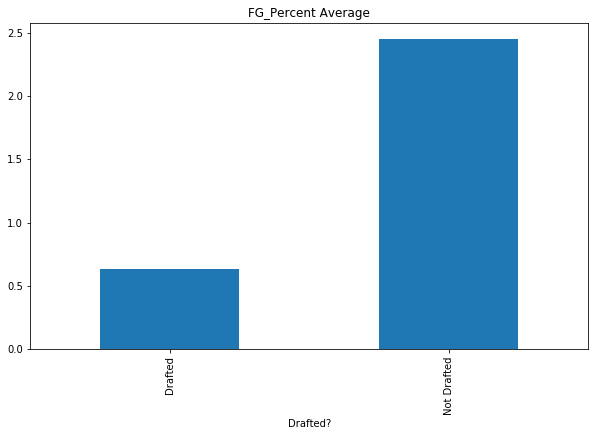

TTL_Kicking_Points Summary:
count   5492.00
mean       1.49
std       12.30
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      156.00
Name: TTL_Kicking_Points, dtype: float64
----------------------------------------
TTL_Kicking_Points Drafted vs Not Drafted
                    TTL_Kicking_Points
DraftedvNotDrafted                    
Drafted                           0.81
Not Drafted                       2.96


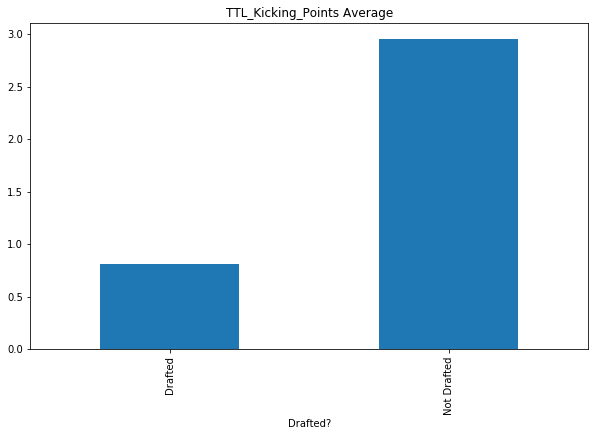

NumPunts Summary:
count   5492.00
mean       0.16
std        2.87
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       81.00
Name: NumPunts, dtype: float64
----------------------------------------
NumPunts Drafted vs Not Drafted
                    NumPunts
DraftedvNotDrafted          
Drafted                 0.06
Not Drafted             0.37


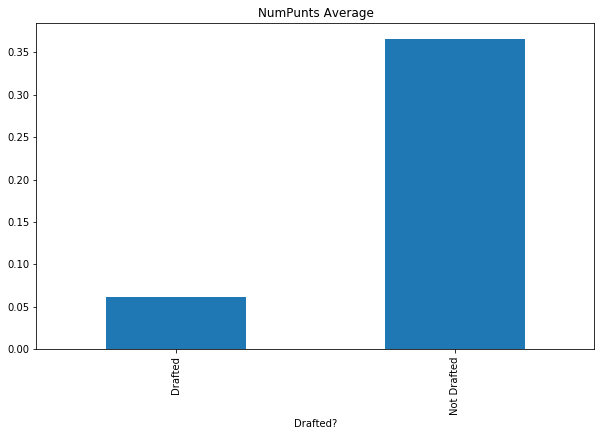

Punt_Yds Summary:
count   5492.00
mean       6.58
std      120.54
min        0.00
25%        0.00
50%        0.00
75%        0.00
max     3259.00
Name: Punt_Yds, dtype: float64
----------------------------------------
Punt_Yds Drafted vs Not Drafted
                    Punt_Yds
DraftedvNotDrafted          
Drafted                 2.73
Not Drafted            14.90


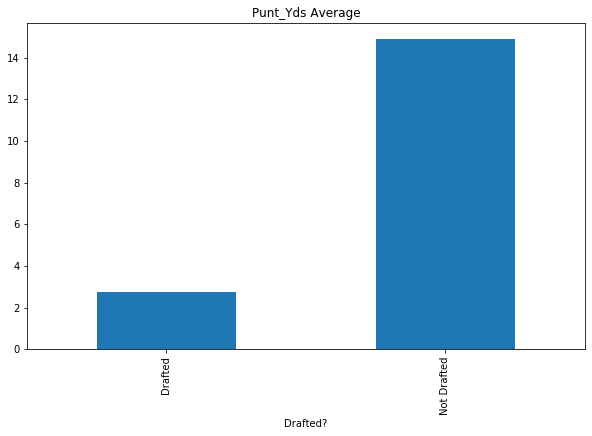

Yds_per_Punt Summary:
count   5492.00
mean       0.20
std        2.84
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       48.10
Name: Yds_per_Punt, dtype: float64
----------------------------------------
Yds_per_Punt Drafted vs Not Drafted
                    Yds_per_Punt
DraftedvNotDrafted              
Drafted                     0.07
Not Drafted                 0.49


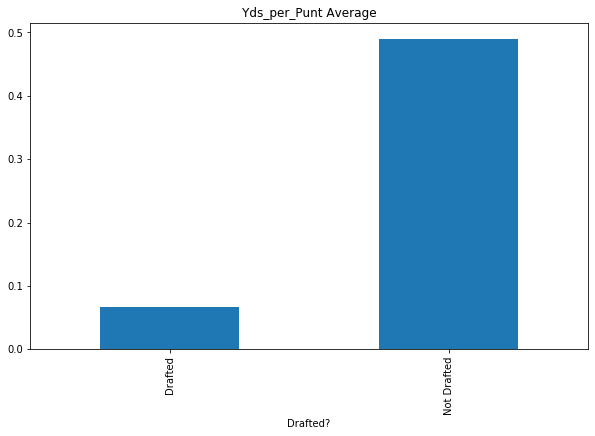

XP_MadeperGame Summary:
count   5492.00
mean       0.05
std        0.42
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        6.21
Name: XP_MadeperGame, dtype: float64
----------------------------------------
XP_MadeperGame Drafted vs Not Drafted
                    XP_MadeperGame
DraftedvNotDrafted                
Drafted                       0.03
Not Drafted                   0.10


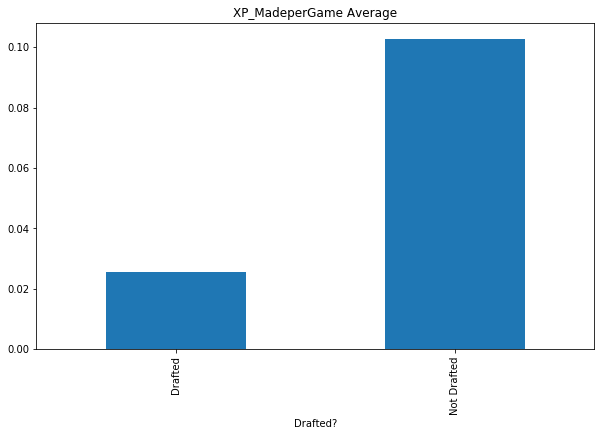

XP_AttemptsperGame Summary:
count   5492.00
mean       0.05
std        0.43
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        6.29
Name: XP_AttemptsperGame, dtype: float64
----------------------------------------
XP_AttemptsperGame Drafted vs Not Drafted
                    XP_AttemptsperGame
DraftedvNotDrafted                    
Drafted                           0.03
Not Drafted                       0.11


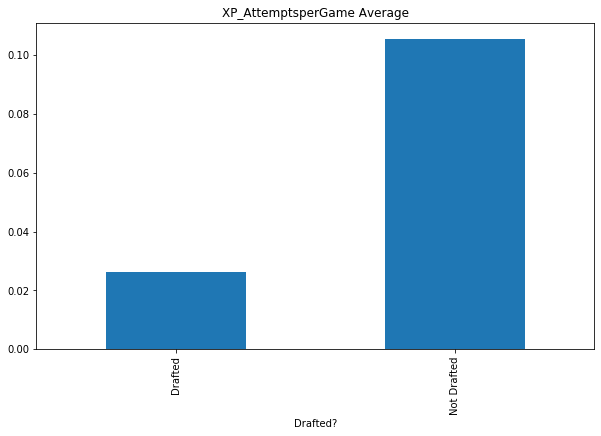

FG_MadeperGame Summary:
count   5492.00
mean       0.02
std        0.19
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.42
Name: FG_MadeperGame, dtype: float64
----------------------------------------
FG_MadeperGame Drafted vs Not Drafted
                    FG_MadeperGame
DraftedvNotDrafted                
Drafted                       0.01
Not Drafted                   0.05


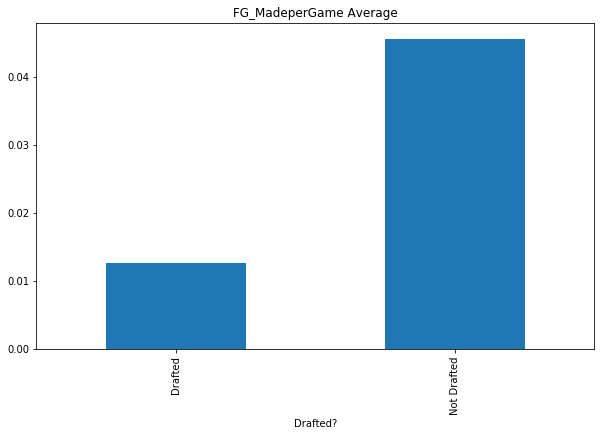

FG_AttemptsperGame Summary:
count   5492.00
mean       0.03
std        0.24
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.92
Name: FG_AttemptsperGame, dtype: float64
----------------------------------------
FG_AttemptsperGame Drafted vs Not Drafted
                    FG_AttemptsperGame
DraftedvNotDrafted                    
Drafted                           0.02
Not Drafted                       0.06


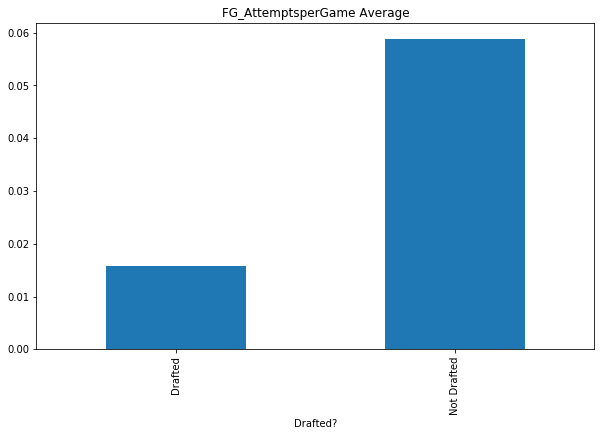

TTL_Kicking_PointsperGame Summary:
count   5492.00
mean       0.12
std        0.98
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       12.00
Name: TTL_Kicking_PointsperGame, dtype: float64
----------------------------------------
TTL_Kicking_PointsperGame Drafted vs Not Drafted
                    TTL_Kicking_PointsperGame
DraftedvNotDrafted                           
Drafted                                  0.06
Not Drafted                              0.24


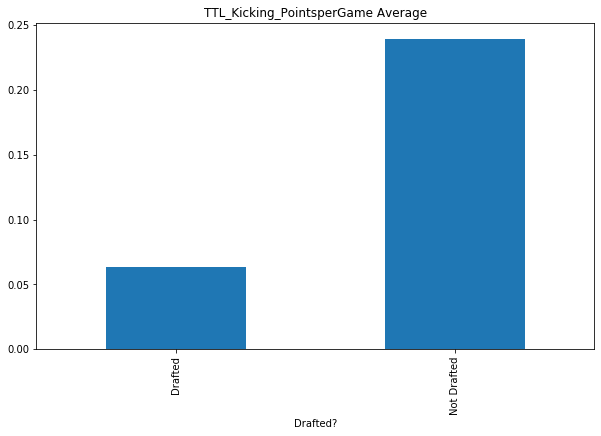

NumPuntsperGame Summary:
count   5492.00
mean       0.01
std        0.23
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        6.23
Name: NumPuntsperGame, dtype: float64
----------------------------------------
NumPuntsperGame Drafted vs Not Drafted
                    NumPuntsperGame
DraftedvNotDrafted                 
Drafted                        0.00
Not Drafted                    0.03


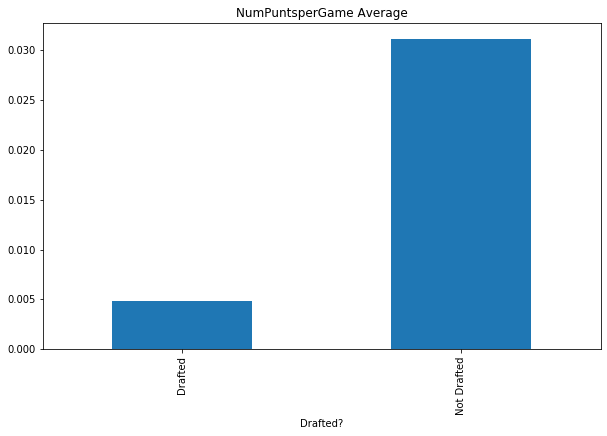

Punt_YdsperGame Summary:
count   5492.00
mean       0.55
std        9.88
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      271.58
Name: Punt_YdsperGame, dtype: float64
----------------------------------------
Punt_YdsperGame Drafted vs Not Drafted
                    Punt_YdsperGame
DraftedvNotDrafted                 
Drafted                        0.21
Not Drafted                    1.27


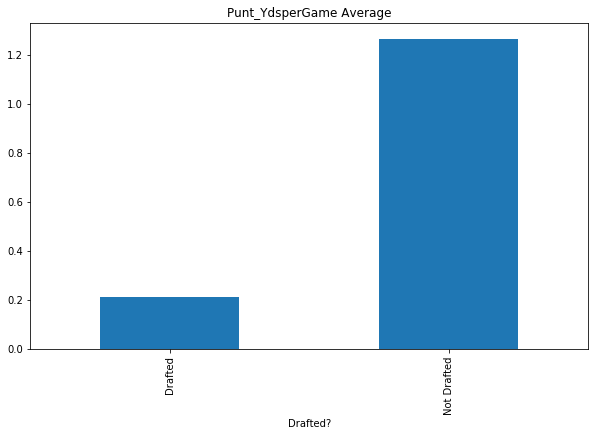

In [196]:
plot_stats_bar(df, kicking_stats)

Safe to say, kickers get no respect. Not Drafted has higher averages in almost all categories. Granted there are usually only one kicker and one punter and they do tend to have longer careers not being tackled to the ground repeatedly so opportunties aren't always present. But kickers win games. That extra point or field goal has absolutely dictated many an outcome and a punter is responsible for field position quite often through the game. Let's check whether these are statistically significant using a two sided t-test.

### Hypothesis Testing

#### Kicking Games

H0: The average number of kicking games is the same between drafted and not drafted.

H1: The average number of kicking games is not the same between drafted and not drafted.


#### Extra Points Made

H0: The average number of extra points made is the same between drafted and not drafted.

H1: The average number of extra points made is not the same between drafted and not drafted.


#### Extra Point Attempts

H0: The average number of extra point attempts is the same between drafted and not drafted.

H1: The average number of extra point attempts is not the same between drafted and not drafted.


#### Extra Points Percent

H0: The average ratio of extra points made to attempts is the same between drafted and not drafted.

H1: The average ratio of extra points made to attempts is not the same between drafted and not drafted.


#### Field Goals Made

H0: The number of field goals made is the same between drafted and not drafted.

H1: The number of field goals made is not the same between drafted and not drafted.


#### Field Goal Attempts

H0: The average number of field goal attempts is the same between drafted and not drafted.

H1: The average number of field goal attempts is not the same between drafted and not drafted.


#### Field Goals Percent

H0: The average ratio of field goals made to attempts is the same between drafted and not drafted.

H1: The average ratio of field goals made to attempts is not the same between drafted and not drafted.


#### Kicking Points

H0: The average number of kicking points is the same between drafted and not drafted.

H1: The average number of kicking points is not the same between drafted and not drafted.


#### Number of Punts

H0: The average number of punts by players is the same between drafted and not drafted.

H1: The average number of punts by players is not the same between drafted and not drafted.


####  Punt Yds

H0: The average number of punt yards is the same between drafted and not drafted.

H1: The average number of punt yards is not the same between drafted and not drafted.


#### Yards per Punt

H0: The average yards per punt is the same between drafted and not drafted.

H1: The average yards per punt is the same between drafted and not drafted.


#### Extra Points Made per Game

H0: The average number of extra points made per game is the same between drafted and not drafted.

H1: The average number of extra points made per game is not the same between drafted and not drafted.


#### Extra Point Attempts per Game

H0: The average number of extra point attempts per game is the same between drafted and not drafted.

H1: The average number of extra point attempts per game is not the same between drafted and not drafted.


#### Field Goals Made per Game

H0: The average number of field goals made per game is the same between drafted and not drafted.

H1: The average number of field goals made per game is not the same between drafted and not drafted.


#### Field Goal Attempts per Game

H0: The average number of field goal attempts per game is the same between drafted and not drafted.

H1: The average number of field goal attempts per game is not the same between drafted and not drafted.


#### Total Kicking Points per Game

H0: The average number of total kicking points per game is the same between drafted and not drafted.

H1: The average number of total kicking points per game is not the same between drafted and not drafted.


#### Number of Punts per Game

H0: The average number of punts per game is the same between drafted and not drafted.

H1: The average number of punts per game is not the same between drafted and not drafted.


#### Punt Yds per Game

H0: The average number of punt yards per game is the same between drafted and not drafted.

H1: The average number of punt yards per game is not the same between drafted and not drafted.

In [198]:
for i in kicking_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df, i)
    print('')
    print('*' * 40)

Kicking_Games T Test:
----------------------------------------
T-stastistic:  -6.22835661260086
P-value:  5.063845967636629e-10
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
XP_Made T Test:
----------------------------------------
T-stastistic:  -6.127740963357477
P-value:  9.533935212646356e-10
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
XP_Attempts T Test:
----------------------------------------
T-stastistic:  -6.1934406154661605
P-value:  6.314167353650487e-10
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
XP_Percent T Test:
----------------------------------------
T-stastistic:  -6.466790015930898
P-value:  1.087691801525164e-10
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
FG_Made T Test:
-----------------------------------

Hitting extra points and field goals matter! All of these metrics reject the null hypothesis. As a Jets fan, I can attest to the fact that games are won on XP and field goals so we all need to revist what we think of as a top pick and find some kickers!

### College Stats - Punt Returns

In [199]:
puntret_stats = ['PuntRet_Games', 'Kickoff_Returns', 'KO_Return_Yds', 'Yds_per_KO_Return', 'KO_Returned_for_TD', 
                 'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame', 'KO_Returned_for_TDperGame']

In [200]:
df[puntret_stats].describe()

,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,1.61,0.21,4.95,0.63,0.00,0.02,0.41,0.00
std,4.13,1.81,44.34,3.75,0.06,0.15,3.67,0.00
min,0.00,0.00,-8.00,-8.00,0.00,0.00,-0.89,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,33.00,845.00,41.00,2.00,2.75,65.00,0.17


In [146]:
puntret_stats = ['Kickoff_Returns', 'KO_Return_Yds', 'Yds_per_KO_Return']

PuntRet_Games Summary:
count   5492.00
mean       1.61
std        4.13
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       15.00
Name: PuntRet_Games, dtype: float64
----------------------------------------
PuntRet_Games Drafted vs Not Drafted
                    PuntRet_Games
DraftedvNotDrafted               
Drafted                      1.70
Not Drafted                  1.40


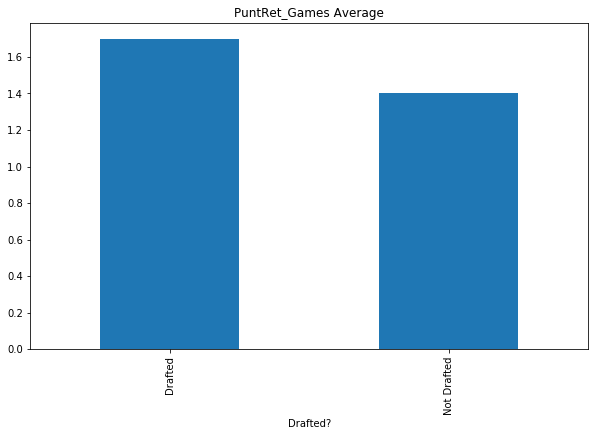

Kickoff_Returns Summary:
count   5492.00
mean       0.21
std        1.81
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       33.00
Name: Kickoff_Returns, dtype: float64
----------------------------------------
Kickoff_Returns Drafted vs Not Drafted
                    Kickoff_Returns
DraftedvNotDrafted                 
Drafted                        0.26
Not Drafted                    0.12


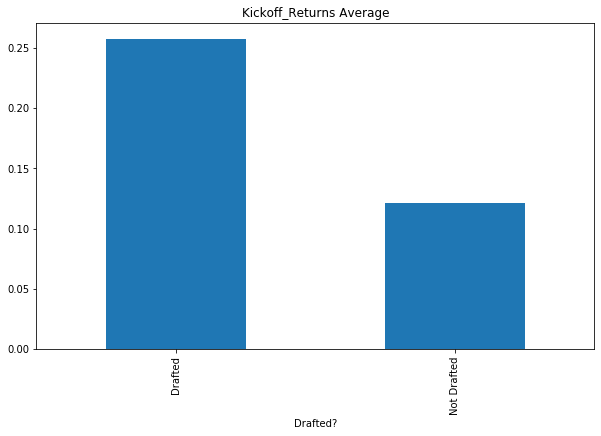

KO_Return_Yds Summary:
count   5492.00
mean       4.95
std       44.34
min       -8.00
25%        0.00
50%        0.00
75%        0.00
max      845.00
Name: KO_Return_Yds, dtype: float64
----------------------------------------
KO_Return_Yds Drafted vs Not Drafted
                    KO_Return_Yds
DraftedvNotDrafted               
Drafted                      6.01
Not Drafted                  2.64


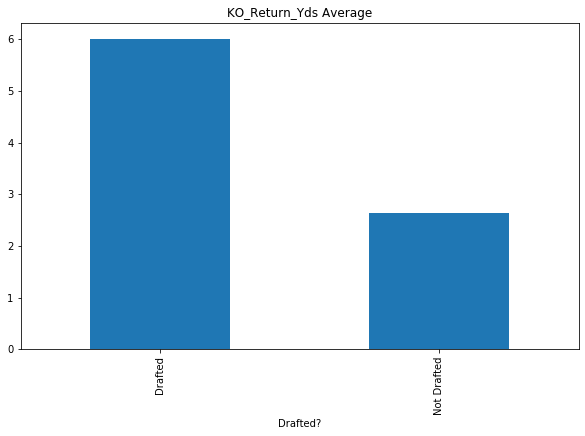

Yds_per_KO_Return Summary:
count   5492.00
mean       0.63
std        3.75
min       -8.00
25%        0.00
50%        0.00
75%        0.00
max       41.00
Name: Yds_per_KO_Return, dtype: float64
----------------------------------------
Yds_per_KO_Return Drafted vs Not Drafted
                    Yds_per_KO_Return
DraftedvNotDrafted                   
Drafted                          0.68
Not Drafted                      0.50


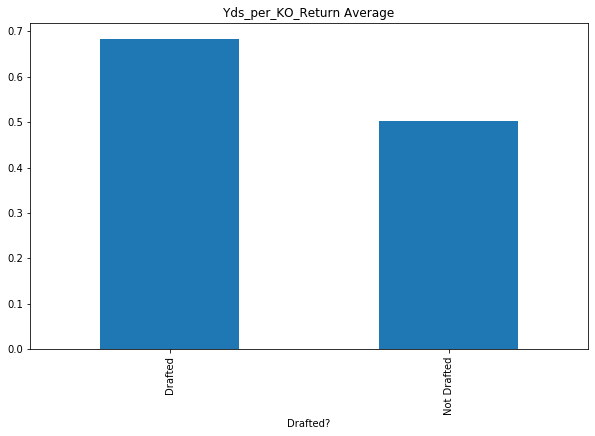

KO_Returned_for_TD Summary:
count   5492.00
mean       0.00
std        0.06
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.00
Name: KO_Returned_for_TD, dtype: float64
----------------------------------------
KO_Returned_for_TD Drafted vs Not Drafted
                    KO_Returned_for_TD
DraftedvNotDrafted                    
Drafted                           0.00
Not Drafted                       0.00


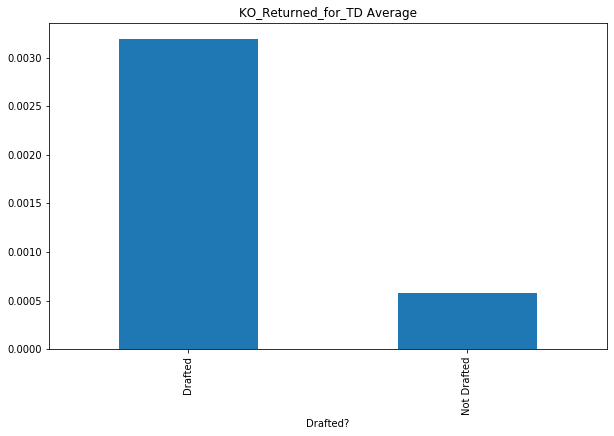

Kickoff_ReturnsperGame Summary:
count   5492.00
mean       0.02
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.75
Name: Kickoff_ReturnsperGame, dtype: float64
----------------------------------------
Kickoff_ReturnsperGame Drafted vs Not Drafted
                    Kickoff_ReturnsperGame
DraftedvNotDrafted                        
Drafted                               0.02
Not Drafted                           0.01


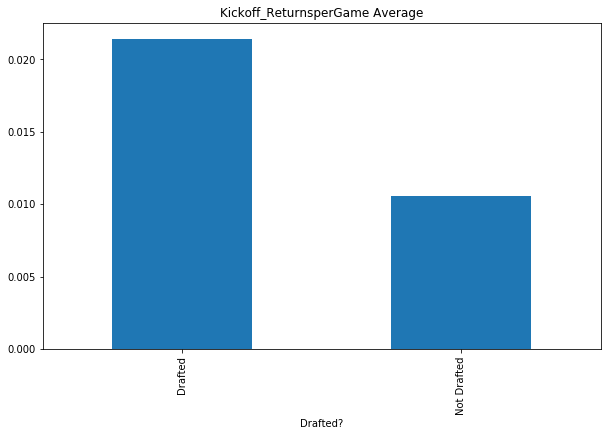

KO_Return_YdsperGame Summary:
count   5492.00
mean       0.41
std        3.67
min       -0.89
25%        0.00
50%        0.00
75%        0.00
max       65.00
Name: KO_Return_YdsperGame, dtype: float64
----------------------------------------
KO_Return_YdsperGame Drafted vs Not Drafted
                    KO_Return_YdsperGame
DraftedvNotDrafted                      
Drafted                             0.50
Not Drafted                         0.23


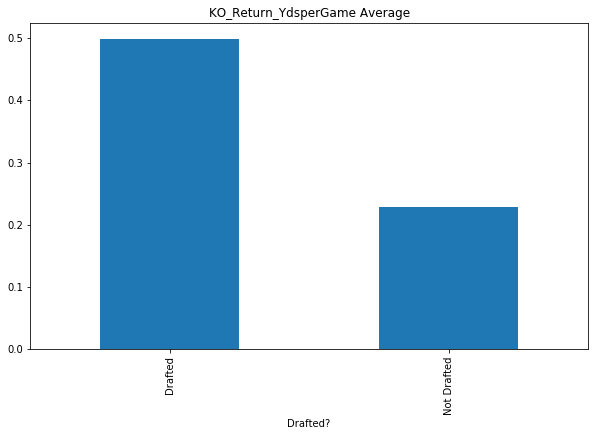

KO_Returned_for_TDperGame Summary:
count   5492.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.17
Name: KO_Returned_for_TDperGame, dtype: float64
----------------------------------------
KO_Returned_for_TDperGame Drafted vs Not Drafted
                    KO_Returned_for_TDperGame
DraftedvNotDrafted                           
Drafted                                  0.00
Not Drafted                              0.00


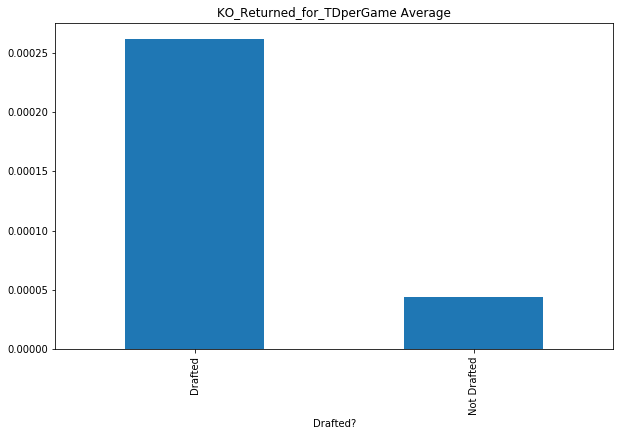

In [201]:
plot_stats_bar(df, puntret_stats)

### Hypothesis Testing

#### Punt Return Games

H0: The average number of punt return games is the same between drafted and not drafted.

H1: The average number of punt return games is not the same between drafted and not drafted.


#### Kickoff Returns

H0: The average number of kickoff returns is the same between drafted and not drafted.

H1: The average number of kickoff returns is not the same between drafted and not drafted.


#### Kickoff Return Yds

H0: The average number of kickoff return yards is the same between drafted and not drafted.

H1: The average number of kickoff return yards is not the same between drafted and not drafted.


#### Yards per Kickoff Return

H0: The average number of yards per kickoff return is the same between drafted and not drafted.

H1: The average number of yards per kickoff return is not the same between drafted and not drafted.


#### Kickoff Returned for a TD

H0: The average number of kickoffs returned for a TD is the same between drafted and not drafted.

H1: The average number of kickoffs returned for a TD is not the same between drafted and not drafted.


#### Kickoff Returns per Game

H0: The average number of kickoff returns per game is the same between drafted and not drafted.

H1: The average number of kickoff returns per game is not the same between drafted and not drafted.


#### Kickoff Return Yds per Game

H0: The average number of kickoff return yards per game is the same between drafted and not drafted.

H1: The average number of kickoff return yards per game is not the same between drafted and not drafted.


#### Kickoff Retured for a TD per Game

H0: The average number of kickoffs returned for a TD per game is the same between drafted and not drafted.

H1: The average number of kickoffs returned for a TD per game is not the same between drafted and not drafted.

In [203]:
for i in puntret_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df,  i)
    print('')
    print('*' * 40)

PuntRet_Games T Test:
----------------------------------------
T-stastistic:  2.479729684523839
P-value:  0.01317797968956775
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Kickoff_Returns T Test:
----------------------------------------
T-stastistic:  2.6076108484369267
P-value:  0.009142334624513748
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
KO_Return_Yds T Test:
----------------------------------------
T-stastistic:  2.6231763339145857
P-value:  0.008735503682911362
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
Yds_per_KO_Return T Test:
----------------------------------------
T-stastistic:  1.659128996670814
P-value:  0.097146920718016
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
KO_Returned_for_TD T Test:
---------

Punt Returns are huge in the game. Setting up with good field position - or again, as a jets fan, simply reliably catching the ball - takes pressure off the offense. A good punt returner is hot commodity. Only 1/3 of kickers and punters are actually drafted when it comes down to it.

I will make sure to include 'PuntRet_Games', 'Kickoff_Returns', 'KO_Return_Yds', 'Kickoff_ReturnsperGame', and 'KO_Return_YdsperGame'.

In [209]:
kickers_punters = df[(df['Position'] == 'K')| (df['Position'] == 'P')]
kickers_punters.head()

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,DraftedvNotDrafted,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
43,Sebastian Janikowski,K,Florida State,2000,73,260,2.46,16.75,8.00,56.75,0.00,0.00,Oakland Raiders,1st,17th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,47.00,47.00,100.00,23.00,30.00,76.70,116.00,0.00,0.00,0.00,4.27,4.27,2.09,2.73,10.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,116.00,0.00,0.00,0.00,0.00,10.55,72,1,SpecialTeams
53,Shane Lechler,P,Texas A&M,2000,74,234,2.46,15.67,8.09,56.95,3.58,2.21,Oakland Raiders,5th,142nd pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,22.00,22.00,0.00,0.00,0.00,0.00,0.00,1.00,22.00,22.00,0.00,0.09,2.00,0.00,0.00,0.00,0.00,0.09,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.82,72,2,SpecialTeams
111,Jason Baker,P,Iowa,2001,73,198,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

Drafted Count: 
----------------------------------------
DF Shape:  (198, 122)
Not Drafted    134
Drafted         64
Name: DraftedvNotDrafted, dtype: int64
Not Drafted   0.68
Drafted       0.32
Name: DraftedvNotDrafted, dtype: float64


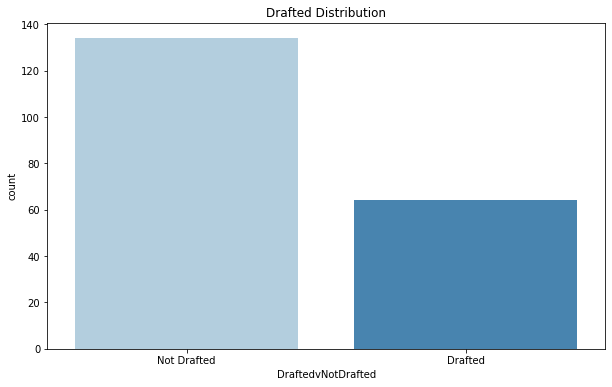

In [211]:
plot_outcomes(kickers_punters)

### College Stats - Scoring

In [149]:
scoring_stats = ['Scoring_Games', 'TD_Other', 'Ttl_TDs', 'TwoPT_Conversion', 'Safety', 'TTL_Points', 'TD_OtherperGame',
                 'Ttl_TDsperGame', 'TwoPT_ConversionperGame', 'SafetyperGame', 'TTL_PointsperGame']

In [150]:
df[scoring_stats].describe()

,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame
count,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00,5492.00
mean,7.31,-0.00,3.01,0.00,0.00,19.59,-0.00,inf,inf,0.00,inf
std,5.96,0.03,4.98,0.07,0.03,31.30,0.00,nan,nan,0.00,nan
min,0.00,-1.00,0.00,0.00,0.00,0.00,-0.09,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,11.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.16
75%,13.00,0.00,4.00,0.00,0.00,30.00,0.00,0.38,0.00,0.00,2.57
max,15.00,0.00,32.00,2.00,1.00,192.00,0.00,inf,inf,0.09,inf


Once again I have pesky 'inf' values in my 'perGame' metrics. I'll have to drop these as well. This all goes back to missing game numbers for just a handful of observations for their final year of college play.

In [204]:
scoring_stats = ['Scoring_Games', 'TD_Other', 'Ttl_TDs', 'TwoPT_Conversion', 'Safety', 'TTL_Points']

Scoring_Games Summary:
count   5492.00
mean       7.31
std        5.96
min        0.00
25%        0.00
50%       11.00
75%       13.00
max       15.00
Name: Scoring_Games, dtype: float64
----------------------------------------
Scoring_Games Drafted vs Not Drafted
                    Scoring_Games
DraftedvNotDrafted               
Drafted                      7.27
Not Drafted                  7.39


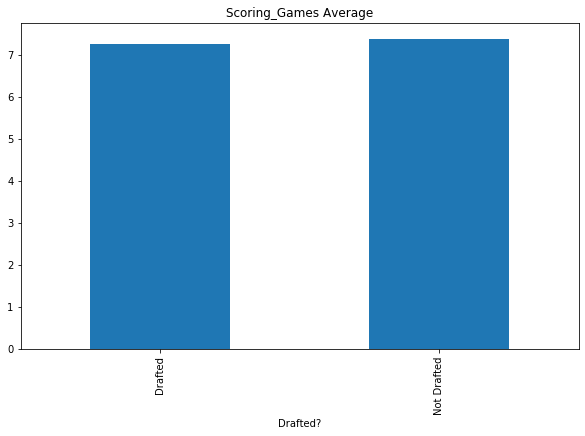

TD_Other Summary:
count   5492.00
mean      -0.00
std        0.03
min       -1.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TD_Other, dtype: float64
----------------------------------------
TD_Other Drafted vs Not Drafted
                    TD_Other
DraftedvNotDrafted          
Drafted                -0.00
Not Drafted            -0.00


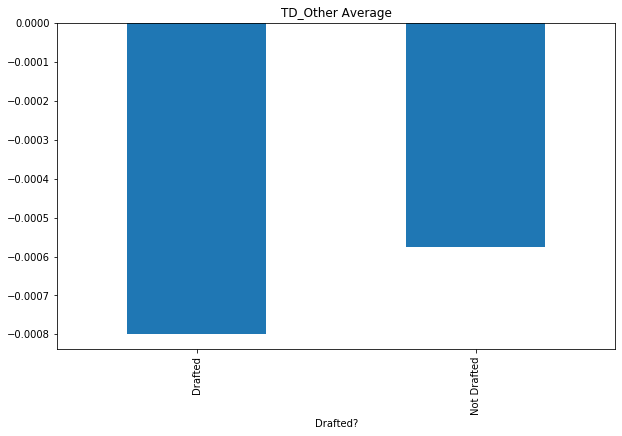

Ttl_TDs Summary:
count   5492.00
mean       3.01
std        4.98
min        0.00
25%        0.00
50%        0.00
75%        4.00
max       32.00
Name: Ttl_TDs, dtype: float64
----------------------------------------
Ttl_TDs Drafted vs Not Drafted
                    Ttl_TDs
DraftedvNotDrafted         
Drafted                3.15
Not Drafted            2.71


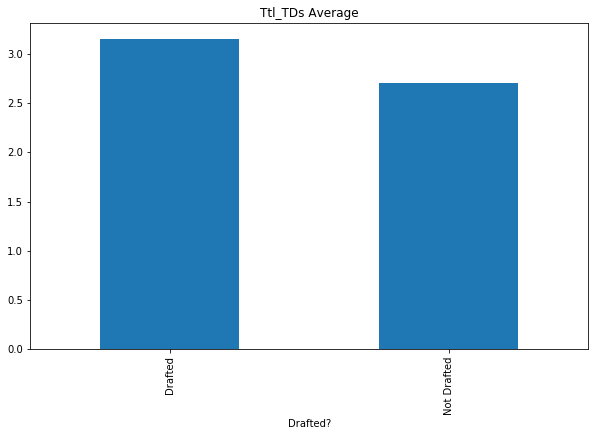

TwoPT_Conversion Summary:
count   5492.00
mean       0.00
std        0.07
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.00
Name: TwoPT_Conversion, dtype: float64
----------------------------------------
TwoPT_Conversion Drafted vs Not Drafted
                    TwoPT_Conversion
DraftedvNotDrafted                  
Drafted                         0.00
Not Drafted                     0.01


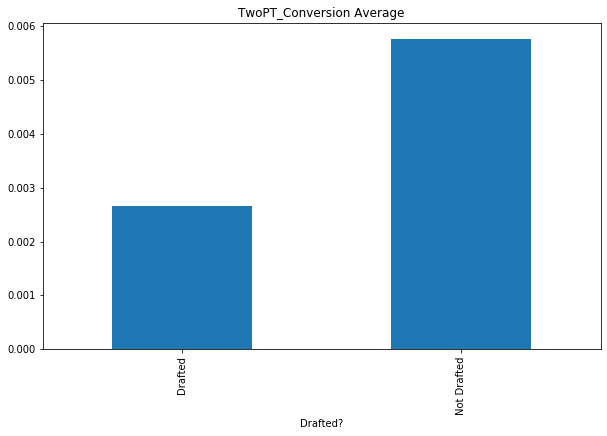

Safety Summary:
count   5492.00
mean       0.00
std        0.03
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Safety, dtype: float64
----------------------------------------
Safety Drafted vs Not Drafted
                    Safety
DraftedvNotDrafted        
Drafted               0.00
Not Drafted           0.00


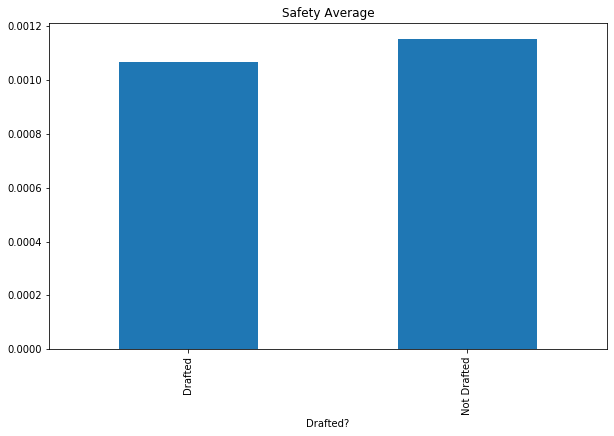

TTL_Points Summary:
count   5492.00
mean      19.59
std       31.30
min        0.00
25%        0.00
50%        2.00
75%       30.00
max      192.00
Name: TTL_Points, dtype: float64
----------------------------------------
TTL_Points Drafted vs Not Drafted
                    TTL_Points
DraftedvNotDrafted            
Drafted                  19.76
Not Drafted              19.22


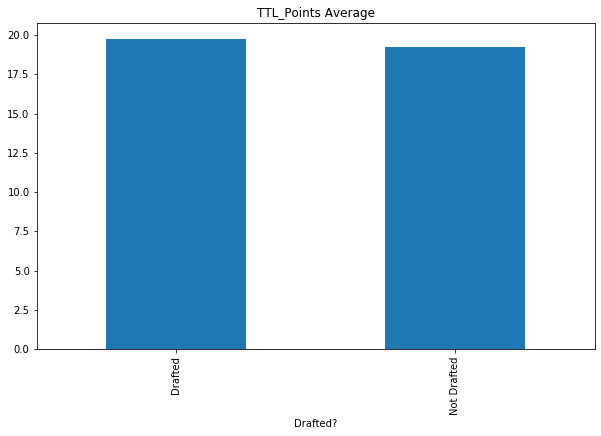

In [205]:
plot_stats_bar(df, scoring_stats)

### Hypothesis Testing

#### Scoring Games
H0: The average number of scoring games is the same between drafted and not drafted.

H1: The average number of scoring games is not the same between drafted and not drafted.


#### 'Other' TDs
H0: The average number of 'other' TDs is the same between drafted and not drafted.

H1: The average number of 'other' TDs is not the same between drafted and not drafted.


#### Total TDs
H0: The average number of total TDs is the same between drafted and not drafted.

H1: The average number of total TDs is not the same between drafted and not drafted.


#### 2pt Conversions
H0: The average number of 2pt conversions is the same between drafted and not drafted.

H1: The average number of 2pt conversions is not the same between drafted and not drafted.


#### Safeties
H0: The average number of safeties is the same between drafted and not drafted.

H1: The average number of safeties is not the same between drafted and not drafted.


#### Total Points
H0: The average number of total points is the same between drafted and not drafted.

H1: The average number of total points is not the same between drafted and not drafted.

In [224]:
for i in scoring_stats:
    print(i + ' T Test:')
    print('-' * 40)
    two_side_ttest(df, i)
    print('')
    print('*' * 40)

Scoring_Games T Test:
----------------------------------------
T-stastistic:  -0.7152938618624934
P-value:  0.474457898180228
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
TD_Other T Test:
----------------------------------------
T-stastistic:  -0.28362893343016876
P-value:  0.7767054566479293
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Ttl_TDs T Test:
----------------------------------------
T-stastistic:  3.1081160786855992
P-value:  0.0018924675293821899
 
The p-value is less than alpha. We can reject the null hypothesis.

****************************************
TwoPT_Conversion T Test:
----------------------------------------
T-stastistic:  -1.6191599565968011
P-value:  0.10547029038423197
 
The p-value is not less than alpha. We fail to reject the null hypothesis.

****************************************
Safety T Test:
--------------

As expected, the only feature that rejects the null is TTL Points. Now that I have validated my features, I can start to model.